# Time Series Analysis with SQL and Python

**Introduction:**

In this project, we use monthly US retail sales data from the Monthly Retail Trade Report: Retail and Food Services Sales, available on the United States Census Bureau website. This data is used as an economic indicator to understand trends in US consumer spending patterns.

 <a href="https://www.census.gov/retail/index.html#mrts" target="_blank">Monthly Retail Trade Report: Retail and Food Services Sales</a>.
 
  <a href="https://www.census.gov/" target="_blank">United States Census Bureau website</a>.

**Data Description:**

The data spans from 1992 to 2020 and includes both total sales as well as details for subcategories of retail sales. Sales figures are in millions of US dollars.

**Project Goals:**

The goal of this project is to identify trends in the data, find patterns and direction in which the data is moving, and address the challenge of noise in the data that can make it hard to determine a trend.

**Data Analysis Techniques:**

We explore several techniques for trending time series data, including simple trends for graphing, comparing components of a trend, using percent of total calculations to compare parts to the whole, and indexing to see the percent change from a reference time period. We also use rolling time windows, also known as moving calculations, to smooth the data and take into account multiple periods.

In addition, we analyze the data for seasonality, which is any pattern that repeats over regular intervals. We use benchmarking against similar time periods and analyze the difference to work with seasonal data.

**Tools Used:**

In this project, we leverage the power of **SQL** and **Python** for data analysis, including the use of **Window Functions**. Our analysis begins with an exploration of the data, followed by the demonstration of how to execute SQL queries on Pandas DataFrames in Python. To create meaningful **visualizations**, we employ various libraries such as **Matplotlib**. By using these tools, we can effectively analyze and communicate our findings to stakeholders in a clear and concise manner.

**Conclusions, Trends, and Insights:**

For a more detailed summary of trends and insights, please refer to the conclusion section of the project.

## 1. Data Exploration

To begin the analysis, we will use the retail_sales_DF table. We can use the pandas library's **read_csv** function to read CSV files into DataFrames.

In [1]:
#import libraries
import pandas as pd

#read in the data
retail_sales_DF =pd.read_csv(r'C:\Rodrigo\Data sets\us_retail_sales.csv')

With the head method we can show samples of the **retail_sales_DF** Preview of the US retail sales data set:

In [2]:
retail_sales_DF.head(5)

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,1992-01-01,441,Motor vehicle and parts dealers,NaN,29811.0
1,1992-01-01,4411,Automobile dealers,NaN,25800.0
2,1992-01-01,"4411, 4412",Automobile and other motor vehicle dealers,NaN,26788.0
3,1992-01-01,44111,New car dealers,NaN,24056.0
4,1992-01-01,44112,Used car dealers,NaN,1744.0


As shown in the sample data above, the retail_sales_DF table comprises the following columns: sales_month, naics_code, kind_of_business, reason_for_null (if applicable), and sales. The 'sales_month' column contains the month and year of the sales data, 'naics_code' corresponds to the industry classification code, 'kind_of_business' denotes the type of retail business, and 'sales' represents the total sales amount in millions of US dollars.

## 2. Performing SQL Queries on Pandas DataFrames Using Python

We can query pandas DataFrames using **SQL syntax**. First we need to install **pandasql** library with the syntax below:

`pip install pandasql`

After successfully installing the library, we are able to import the library using the following statement:


In [3]:
from pandasql import sqldf

## 3. Trend Analysis

### 3.1 Exploring Simple Trends: Plotting the Trend of Monthly Retail and Food Services Sales

In time series analysis, it's often useful to identify trends in the data. A trend indicates the direction in which the data is moving. It may be moving up or increasing over time, or it may be moving down or decreasing over time. In some cases, the data may remain more or less flat, or there could be a lot of noise, making it difficult to identify a clear trend.

To illustrate, let's examine the trend in total retail and food services sales in the US:

In [4]:
monthly_retail_food_services_sales = """
SELECT sales_month,sales
FROM retail_sales_DF
WHERE kind_of_business = 'Retail and food services sales, total'
ORDER BY 1"""
df_monthly_retail_food_services_sales = sqldf(monthly_retail_food_services_sales)
df_monthly_retail_food_services_sales.head(4)

,sales_month,sales
0,1992-01-01,146376.0
1,1992-02-01,147079.0
2,1992-03-01,159336.0
3,1992-04-01,163669.0


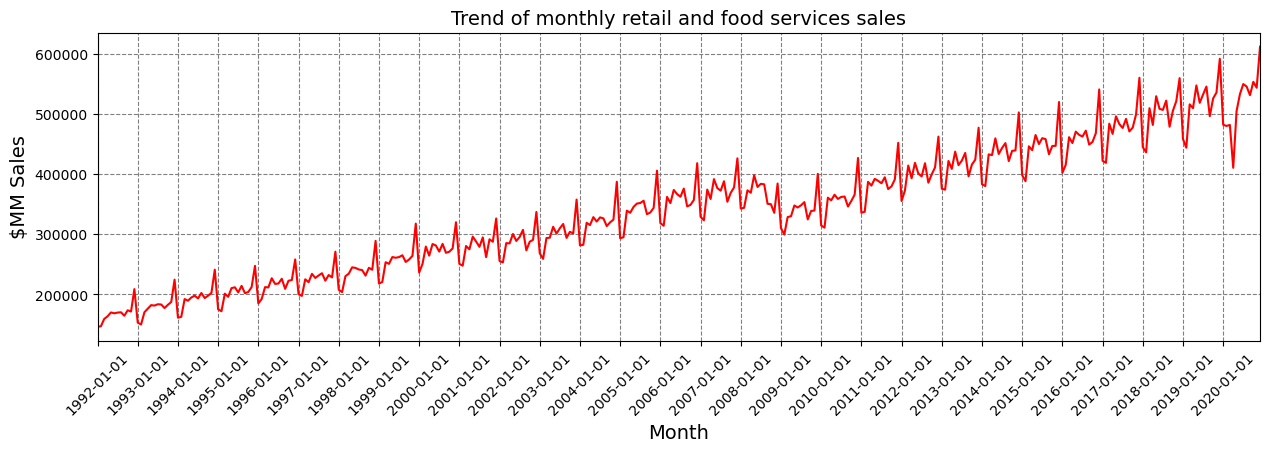

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = df_monthly_retail_food_services_sales

sales_month = df['sales_month']
sales = df['sales']


plt.figure(figsize=(15, 4)) 

# plot a line graph
plt.plot(sales_month, sales, color='red')
plt.title('Trend of monthly retail and food services sales', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('$MM Sales', fontsize=14)

# Display major gridlines

plt.grid(visible=True, which='major', color='grey', linestyle='--')


# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Show only a few values of "Month" on the x-axis
plt.xticks(np.arange(0, len(df), 12), sales_month[::12], rotation=45)

plt.show()

The figure above shows the trend of monthly retail and food services sales. As we can see, the data exhibits certain patterns but also contains some level of noise. By analyzing this trend, we can gain insights into how sales have changed over time in this industry.

### 3.2 Aggregating Yearly Sales: Transforming the Data and Aggregating at the Yearly Level

Transforming and aggregating the data at the yearly level can help us gain a better understanding of the sales trends. To achieve this, we can use the **strftime** function to extract the year from the **sales_month** field and then aggregate the sales data by year. The results are then filtered to include only the "Retail and food services sales, total" kind_of_business in the WHERE clause:

In [6]:
yearly_total_retail_food_services_sales = """
SELECT strftime('%Y', sales_month) as sales_year,
       sum(sales) as sales
FROM retail_sales_DF
WHERE kind_of_business = 'Retail and food services sales, total'
GROUP BY 1
ORDER BY 1
"""
df_yearly_total_retail_food_services_sales = sqldf(yearly_total_retail_food_services_sales)
df_yearly_total_retail_food_services_sales.head(4)

,sales_year,sales
0,1992,2014102.0
1,1993,2153095.0
2,1994,2330235.0
3,1995,2450628.0


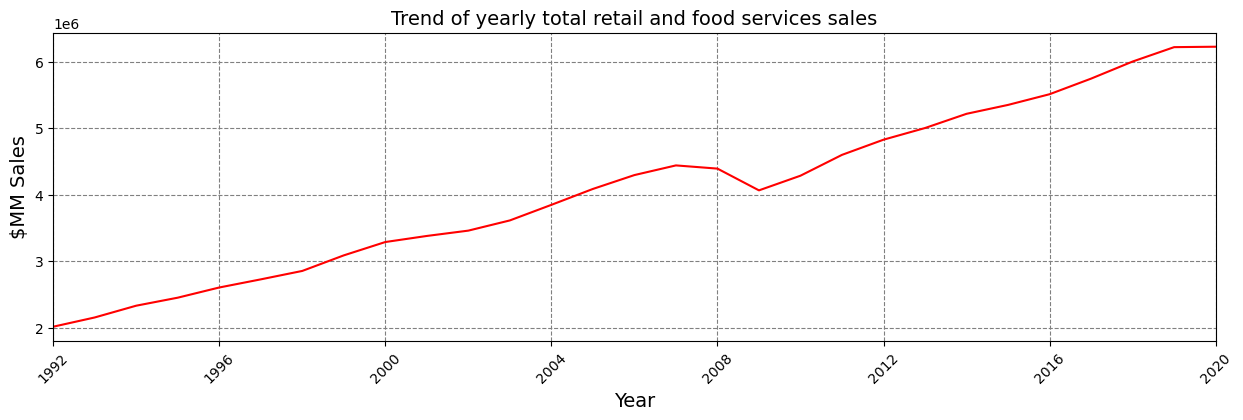

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = df_yearly_total_retail_food_services_sales

sales_year = df['sales_year']
sales = df['sales']

plt.figure(figsize=(15, 4)) 

# plot a line graph
plt.plot(sales_year, sales, color='red')
plt.title('Trend of yearly total retail and food services sales', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('$MM Sales', fontsize=14)

# Display major gridlines

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Show only a few values of "Year" on the x-axis
plt.xticks(np.arange(0, len(df), 4), sales_year[::4], rotation=45)

plt.show()

The figure above shows the transformed and aggregated time series data of yearly retail and food services sales. The plot reveals a smoother time series that generally increases over time, with sales values not adjusted for inflation. It is noteworthy that sales for all retail and food services declined in 2009, during the global financial crisis, and grew every year throughout the 2010s. However, due to the impact of the COVID-19 pandemic, sales were flat in 2020 compared to 2019.

Analyzing time series data at different levels of aggregation, such as weekly, monthly, or yearly, is a great way to identify trends. This step can serve as a useful profiling tool or as the final output of the analysis, depending on the analysis goals.

### 3.3 Comparing Components

#### 3.3.1 Trend of Yearly Sporting Goods, Hobby, and Book Stores Sales

Data sets often contain multiple time series that span the same time range. Comparing these time series can reveal interesting patterns. In the retail sales data set, there are values for total sales as well as subcategories. By comparing the yearly sales trends for specific categories, we can gain insight into consumer spending behavior. For example, we can compare the sales trends for book stores, sporting goods stores, and hobby stores, which are all associated with leisure activities.

In [8]:
yearly_retail_sales_for_Books_Sports_Toys = """
SELECT 
strftime('%Y', sales_month) as sales_year,
kind_of_business,
sum(sales) as sales
FROM retail_sales_DF
WHERE kind_of_business in ('Book stores','Sporting goods stores','Hobby, toy, and game stores')
GROUP BY 1,2
ORDER BY 1,2
"""
df_yearly_retail_sales_for_Books_Sports_Toys = sqldf(yearly_retail_sales_for_Books_Sports_Toys)
df_yearly_retail_sales_for_Books_Sports_Toys.head(4)

,sales_year,kind_of_business,sales
0,1992,Book stores,8327.0
1,1992,"Hobby, toy, and game stores",11251.0
2,1992,Sporting goods stores,15583.0
3,1993,Book stores,9108.0


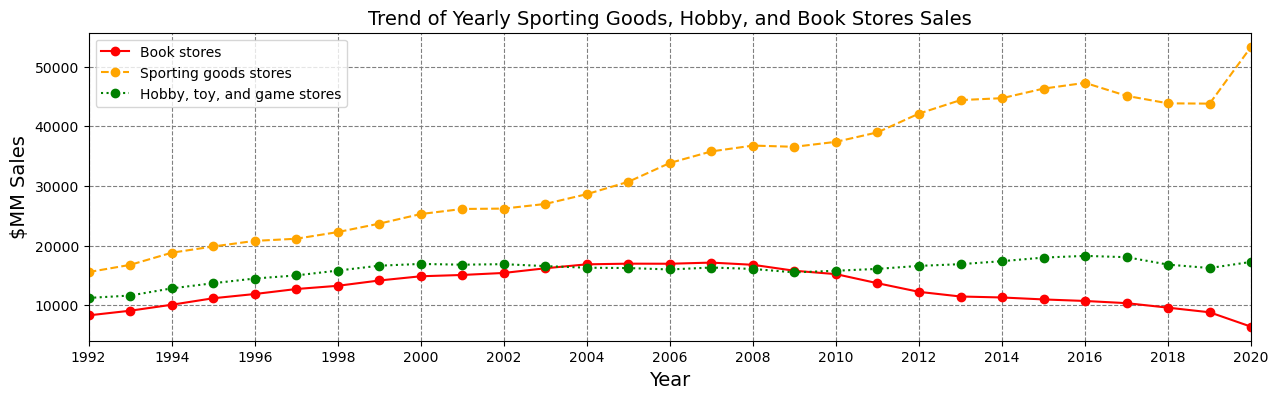

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = df_yearly_retail_sales_for_Books_Sports_Toys


book_sales = df['sales'].loc[df['kind_of_business']=='Book stores']
book_year = df['sales_year'].loc[df['kind_of_business']=='Book stores']


sport_sales=df['sales'].loc[df['kind_of_business']=='Sporting goods stores']
sport_year=df['sales_year'].loc[df['kind_of_business']=='Sporting goods stores']


hobby_sales=df['sales'].loc[df['kind_of_business']=='Hobby, toy, and game stores']
hobby_year=df['sales_year'].loc[df['kind_of_business']=='Hobby, toy, and game stores']


plt.figure(figsize=(15, 4)) 

# plot a line graph

plt.plot(book_year,book_sales, label='Book stores',color='red', linestyle="-" , marker='o')
plt.plot(sport_year,sport_sales , label='Sporting goods stores',color='orange', linestyle="--" , marker='o')
plt.plot(hobby_year,hobby_sales , label='Hobby, toy, and game stores',color='green', linestyle=":" , marker='o')


plt.title('Trend of Yearly Sporting Goods, Hobby, and Book Stores Sales', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('$MM Sales', fontsize=14)

# Set the xticks
plt.xticks(df['sales_year'].unique()[::2]) # show every 2 years

# Display major gridlines
plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)


plt.legend()
plt.show()

The figure above compares the yearly sales trend for three leisure activity categories in the retail sales dataset: book stores, sporting goods stores, and hobby stores. Sales at sporting goods stores started the highest among the three categories and grew much faster during the time period. By the end of the time series, those sales were substantially higher. Although sales at sporting goods stores declined in 2017, they had a big rebound in 2020. Sales at hobby, toy, and game stores were relatively flat over this time span, with a slight dip in the mid-2000s and another slight decline prior to a rebound in 2020. Sales at book stores grew until the mid-2000s, but since then, they have been on a decline. These categories have all been impacted by the growth of online retailers, but the timing and magnitude of the impact seem to differ.

#### 3.3.2 Monthly trend of sales at women’s and men’s clothing stores

In the next example, we will analyze the sales of women's clothing stores and men's clothing stores. First, we will plot the monthly sales trend for each type of store.

In [10]:
monthly_sales_women_men_clothing_stores= """
SELECT sales_month
,kind_of_business
,sales
FROM retail_sales_DF
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2
"""
df_monthly_sales_women_men_clothing_stores = sqldf(monthly_sales_women_men_clothing_stores)
df_monthly_sales_women_men_clothing_stores.head(7)

,sales_month,kind_of_business,sales
0,1992-01-01,Men's clothing stores,701.0
1,1992-01-01,Women's clothing stores,1873.0
2,1992-02-01,Men's clothing stores,658.0
3,1992-02-01,Women's clothing stores,1991.0
4,1992-03-01,Men's clothing stores,731.0
5,1992-03-01,Women's clothing stores,2403.0
6,1992-04-01,Men's clothing stores,816.0


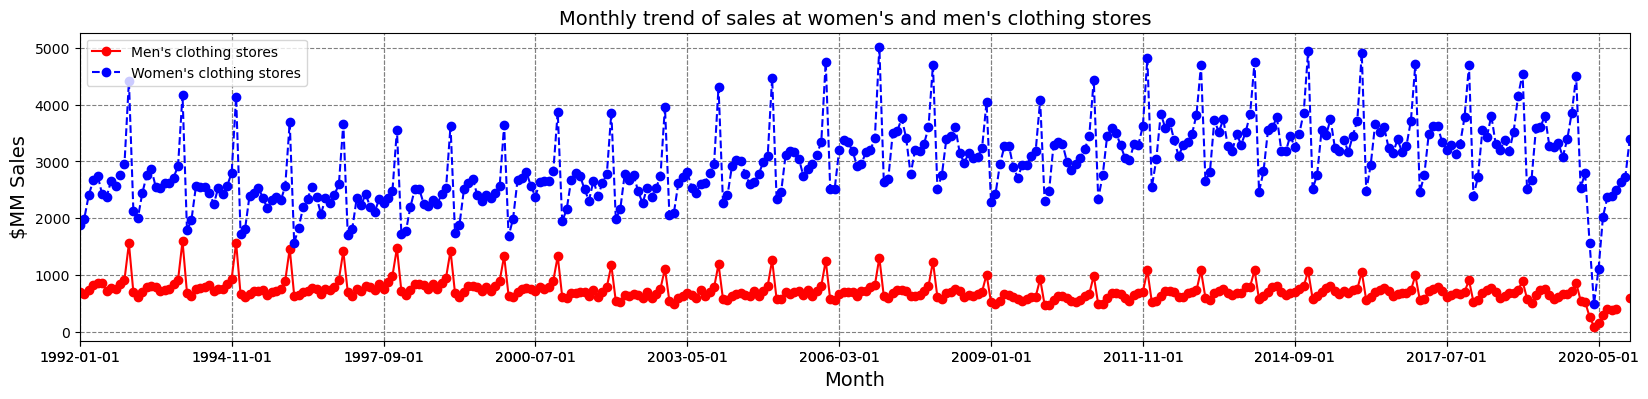

In [11]:
import matplotlib.pyplot as plt
import numpy as np

monthly_sales_df=df_monthly_sales_women_men_clothing_stores

df = monthly_sales_df

men_sales = df['sales'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_sales = df['sales'].loc[df['kind_of_business'] == "Women's clothing stores"]
men_months = df['sales_month'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_months = df['sales_month'].loc[df['kind_of_business'] == "Women's clothing stores"]

plt.figure(figsize=(20, 4))

plt.plot(men_months, men_sales, label="Men's clothing stores", color='red', linestyle="-", marker='o')
plt.plot(women_months, women_sales, label="Women's clothing stores", color='blue', linestyle="--", marker='o')

plt.title(f"Monthly trend of sales at women's and men's clothing stores", fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('$MM Sales', fontsize=14)

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Show some xticks for the men's and women's clothing stores
num_ticks = 10
men_step = len(men_months) // num_ticks
women_step = len(women_months) // num_ticks
plt.xticks(np.append(men_months[::men_step], women_months[::women_step]))

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

plt.legend()
plt.show()

The figure above shows the trend of sales for women's and men's clothing stores. We can observe that sales at women's clothing stores are consistently higher than those at men's clothing stores. Both types of stores exhibit seasonality, with peaks during the holiday season and dips during the summer months. In 2020, both types of stores experienced a significant drop in sales due to store closures and reduced shopping during the COVID-19 pandemic.

Although the monthly data displays interesting patterns, it is noisy. Therefore, we will use yearly aggregates for the next few examples to obtain a smoother trend.

#### 3.3.3 Yearly trend of sales at women’s and men’s clothing stores

We will now plot the yearly sales trend for sales of women's clothing stores and men's clothing stores to obtain a smoother trend.

In [12]:
yearly_sales_women_men_clothing_stores= """
SELECT 
strftime('%Y', sales_month) as sales_year,
kind_of_business,
sum(sales) as sales
FROM retail_sales_DF
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
GROUP BY 1,2
ORDER BY 1,2
"""
df_yearly_sales_women_men_clothing_stores = sqldf(yearly_sales_women_men_clothing_stores)
df_yearly_sales_women_men_clothing_stores.head(4)

,sales_year,kind_of_business,sales
0,1992,Men's clothing stores,10179.0
1,1992,Women's clothing stores,31815.0
2,1993,Men's clothing stores,9962.0
3,1993,Women's clothing stores,32350.0


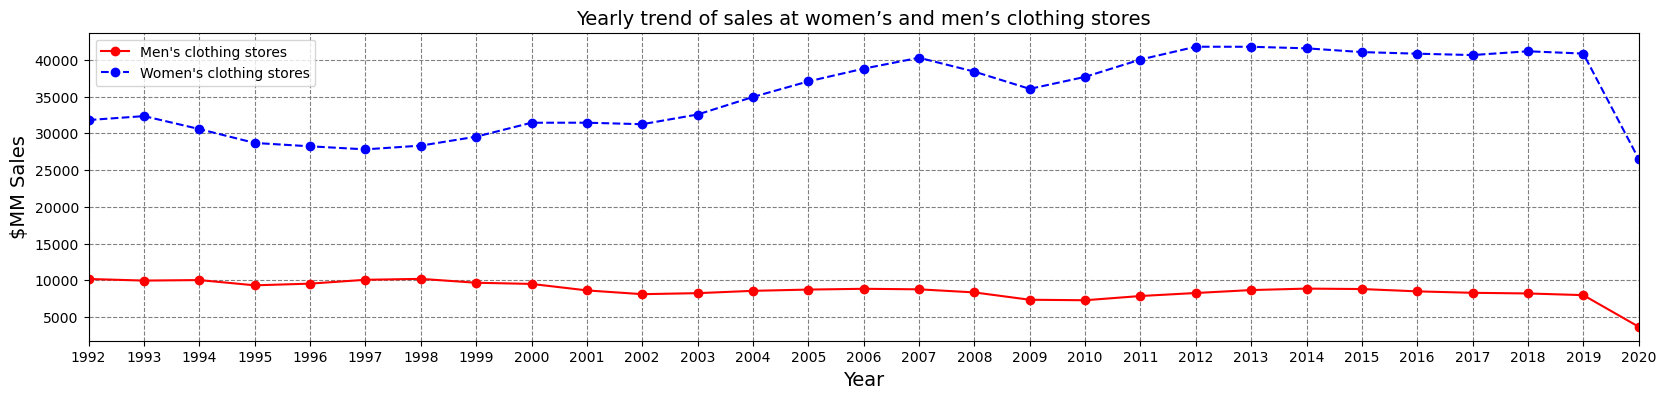

In [13]:
import matplotlib.pyplot as plt
import numpy as np


df = df_yearly_sales_women_men_clothing_stores

men_sales = df['sales'].loc[df['kind_of_business']=="Men's clothing stores"]
women_sales = df['sales'].loc[df['kind_of_business'] == "Women's clothing stores"]
men_year = df['sales_year'].loc[df['kind_of_business']=="Men's clothing stores"]
women_year = df['sales_year'].loc[df['kind_of_business']=="Women's clothing stores"] 


plt.figure(figsize=(20, 4))

# plot a line graph
plt.plot(men_year, men_sales, label="Men's clothing stores",color='red', linestyle="-" , marker='o')
plt.plot(women_year, women_sales, label="Women's clothing stores",color='blue', linestyle="--" , marker='o')

plt.title('Yearly trend of sales at women’s and men’s clothing stores', fontsize=14)
plt.xlabel('Year', fontsize=14)           
plt.ylabel('$MM Sales', fontsize=14)

# Display major gridlines
plt.grid(visible=True, which='major', color='grey', linestyle='--')


# Automatically adjust the x-axis scale based on the data
plt.gca().autoscale(axis='x', tight=True)

plt.legend()
plt.show()

The figure above shows the yearly sales trend for women's clothing stores and men's clothing stores. It is evident that women’s clothing stores have higher sales than men's clothing stores, but **the gap between the two is not constant**. In fact, the gap was increasing during the early to mid-2000s. Both categories experienced a drop in sales during the global financial crisis of 2008-2009, with women's clothing sales being hit harder. The COVID-19 pandemic also had a significant impact, causing a sharp decline in sales for both categories in 2020. By looking at the yearly trend, we obtain a smoother representation of the data and can better observe the overall patterns and trends.

#### 3.3.4 Comparing the Gap Between Components:  

To obtain a more precise measurement of the **gap** between the two categories, we can calculate the numerical difference between their sales and the ratio of women's sales to men's sales.

##### 3.3.4.1 Yearly Sales Gap Comparison between Women's and Men's Clothing Stores:

In [14]:
yearly_difference_between_sales_women_men_clothing= """

SELECT sales_year,
womens_sales - mens_sales as womens_minus_mens,
mens_sales - womens_sales as mens_minus_womens
FROM
(
        SELECT strftime('%Y', sales_month) as sales_year,
        sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales,
        sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
        FROM retail_sales_DF
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        and sales_month <= '2019-12-01'
        GROUP BY 1
) a
ORDER BY 1

"""
df_yearly_difference_between_sales_women_men_clothing = sqldf(yearly_difference_between_sales_women_men_clothing)
df_yearly_difference_between_sales_women_men_clothing.head(7)

,sales_year,womens_minus_mens,mens_minus_womens
0,1992,21636.0,-21636.0
1,1993,22388.0,-22388.0
2,1994,20553.0,-20553.0
3,1995,19381.0,-19381.0
4,1996,18692.0,-18692.0
5,1997,17753.0,-17753.0
6,1998,18136.0,-18136.0


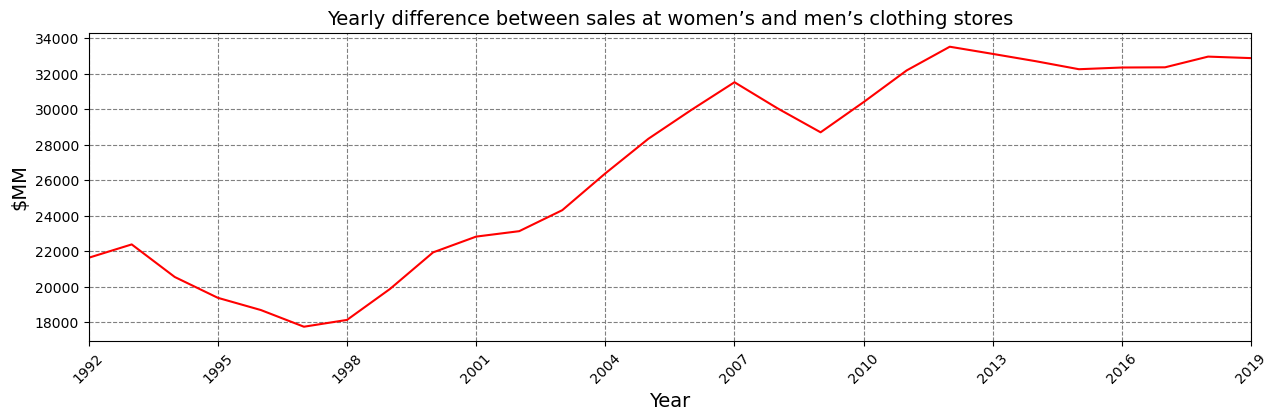

In [15]:
import matplotlib.pyplot as plt
import numpy as np


df = df_yearly_difference_between_sales_women_men_clothing

sales_year = df['sales_year']
womens_minus_mens = df['womens_minus_mens']

plt.figure(figsize=(15, 4)) 

# plot a line graph
plt.plot(sales_year, womens_minus_mens, color='red')
plt.title('Yearly difference between sales at women’s and men’s clothing stores', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('$MM', fontsize=14)

# Display major gridlines

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Show only a few values of "Year" on the x-axis
plt.xticks(np.arange(0, len(df), 3), sales_year[::3], rotation=45)

plt.show()

The figure above illustrates the yearly sales gap between women's and men's clothing stores from 1992 to 2019. It is evident that the gap decreased from 1992 to around 1997, followed by a significant increase until around 2011 (with a brief dip in 2007), and then remained more or less flat through 2019.

##### 3.3.4.2 Comparing Yearly Ratio of Women’s to Men’s Clothing Sales

To gain further insight, , we will analyze the ratio between the sales of women's clothing stores and men's clothing stores. We will use men's sales as the denominator, although it is worth noting that we could also use women's store sales for this comparison.

In [16]:
yearly_ratio_women_to_men_clothing_sales= """

SELECT sales_year,
womens_sales / mens_sales as womens_times_of_mens
FROM
(
        SELECT strftime('%Y', sales_month) as sales_year,
        sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales,
        sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
        FROM retail_sales_DF
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        and sales_month <= '2019-12-01'
        GROUP BY 1
) a
ORDER BY 1

"""
df_yearly_ratio_women_to_men_clothing_sales = sqldf(yearly_ratio_women_to_men_clothing_sales)
df_yearly_ratio_women_to_men_clothing_sales.head(7)

,sales_year,womens_times_of_mens
0,1992,3.125553
1,1993,3.247340
2,1994,3.048744
3,1995,3.080623
4,1996,2.958098
5,1997,2.763134
6,1998,2.778737


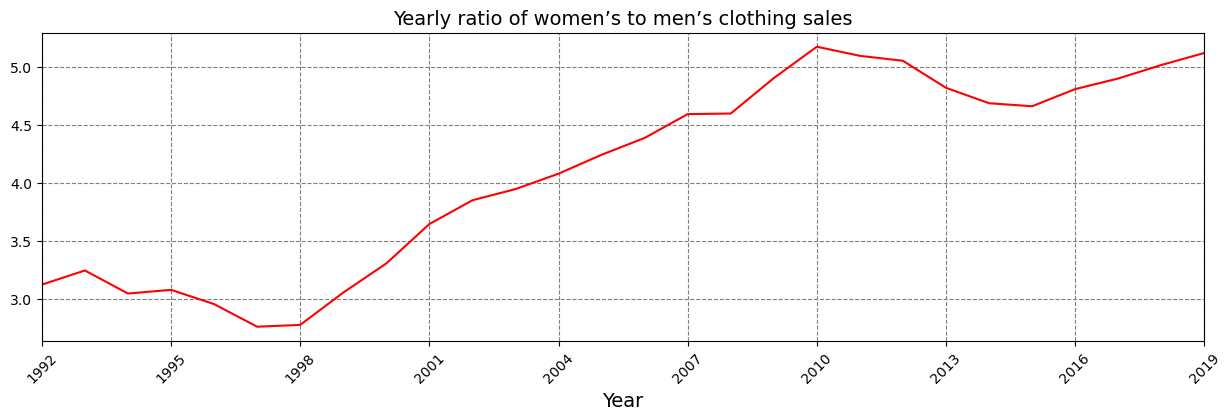

In [17]:
import matplotlib.pyplot as plt
import numpy as np


df = df_yearly_ratio_women_to_men_clothing_sales

sales_year = df['sales_year']
womens_times_of_mens = df['womens_times_of_mens']

plt.figure(figsize=(15, 4)) 

# plot a line graph
plt.plot(sales_year, womens_times_of_mens, color='red')
plt.title('Yearly ratio of women’s to men’s clothing sales', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Display major gridlines

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Show only a few values of "Year" on the x-axis
plt.xticks(np.arange(0, len(df), 3), sales_year[::3], rotation=45)

plt.show()

The figure above shows the result of analyzing the ratio between the sales of women's clothing stores and men's clothing stores, revealing a similar trend to the difference trend. However, unlike the difference trend, there was an increase in the ratio in 2009. The choice between using the difference or the ratio depends on your audience and the norms in your domain. Each statement, such as "in 2009, sales at women's clothing stores were $28.7 billion higher than sales at men's stores" or "in 2009, sales at women's clothing stores were 4.9 times the sales at men's stores," provides accurate information. It's up to the analyst to decide which version to select depending on the story they want to tell with the analysis. By using the transformations seen in this section, we can analyze time series by comparing related parts, gaining further insight into the data.

### 3.4 Percent of Total Calculations

In this section, we will explore analyzing time series data that represent **parts of a whole**. When dealing with such data, it is often useful to analyze each part's contribution to the whole and how it has changed over time.

If the data does not already include a time series of the **total values**, we will need to calculate the overall total to determine the percentage of total for each row. We can use a window function to achieve this:

#### 3.4.1 Analyzing Monthly Sales Contributions: Percent of Total Sales for Each Category

In [18]:
percent_of_total_sales_for_each_category= """

SELECT 
sales_month,
kind_of_business,
sales,
sum(sales) over (partition by sales_month) as total_sales,
sales * 100 / sum(sales) over (partition by sales_month) as pct_total
FROM retail_sales_DF 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1

"""
df_percent_of_total_sales_for_each_category = sqldf(percent_of_total_sales_for_each_category)
df_percent_of_total_sales_for_each_category.head(7)

,sales_month,kind_of_business,sales,total_sales,pct_total
0,1992-01-01,Men's clothing stores,701.0,2574.0,27.233877
1,1992-01-01,Women's clothing stores,1873.0,2574.0,72.766123
2,1992-02-01,Men's clothing stores,658.0,2649.0,24.839562
3,1992-02-01,Women's clothing stores,1991.0,2649.0,75.160438
4,1992-03-01,Men's clothing stores,731.0,3134.0,23.324825
5,1992-03-01,Women's clothing stores,2403.0,3134.0,76.675175
6,1992-04-01,Men's clothing stores,816.0,3481.0,23.441540


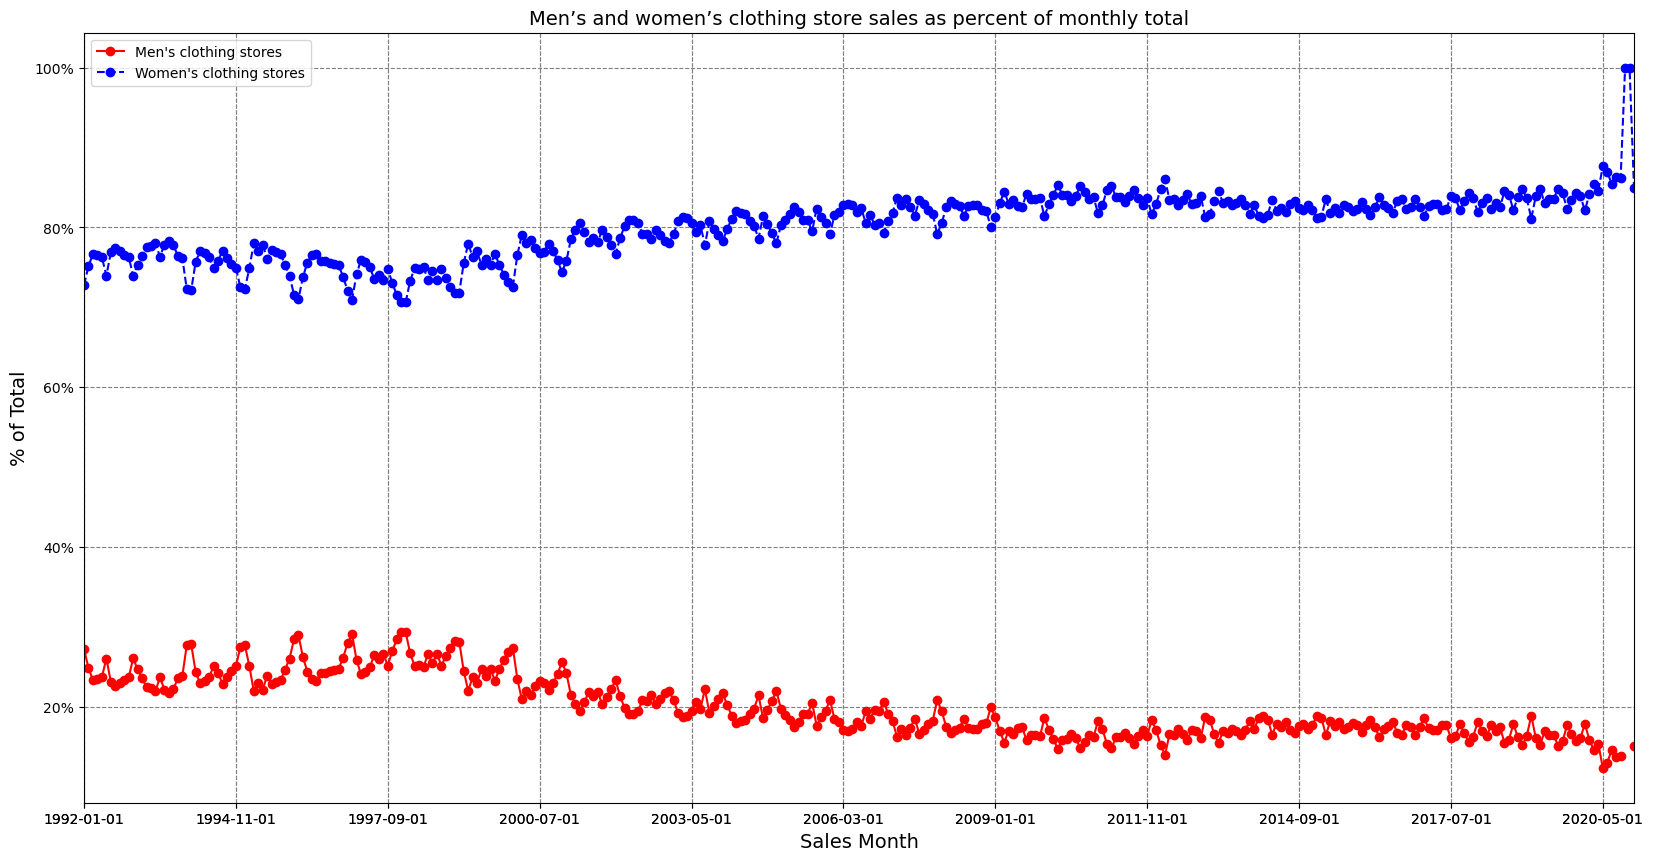

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = df_percent_of_total_sales_for_each_category

plt.figure(figsize=(20, 10))

men_sales = df['pct_total'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_sales = df['pct_total'].loc[df['kind_of_business'] == "Women's clothing stores"]
men_months = df['sales_month'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_months = df['sales_month'].loc[df['kind_of_business'] == "Women's clothing stores"]

plt.plot(men_months, men_sales, label="Men's clothing stores", color='red', linestyle="-", marker='o')
plt.plot(women_months, women_sales, label="Women's clothing stores", color='blue', linestyle="--", marker='o')

plt.title(f"Men’s and women’s clothing store sales as percent of monthly total", fontsize=14)
plt.xlabel('Sales Month', fontsize=14)
plt.ylabel('% of Total', fontsize=14)

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Show some xticks for the men's and women's clothing stores
num_ticks = 10
men_step = len(men_months) // num_ticks
women_step = len(women_months) // num_ticks
plt.xticks(np.append(men_months[::men_step], women_months[::women_step]))

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Format y-axis tick labels as percentages
fmt = '%.0f%%'  # format string for tick labels
yticks = mtick.FormatStrFormatter(fmt)  # create formatter
plt.gca().yaxis.set_major_formatter(yticks)  # apply formatter to y-axis ticks

plt.legend()
plt.show()

After calculating the percent of monthly total sales for each category, we graphed the data as shown in Figure above and found some interesting trends.

Firstly, **starting in the late 1990s, women's clothing store sales increased as a percentage of the total sales, indicating a growing market for women's clothing.**

Secondly, the data exhibits **strong seasonal patterns**, with men's sales spiking as a percent of total sales in December and January during the early years of the series. Later, in the first decade of the 21st century, two seasonal peaks appear, one in the summer and the other in the winter. However, **by the late 2010s, the seasonal patterns are dampened almost to the point of randomness**. We will explore this lack of seasonality in greater depth later in this project.

#### 3.4.2 Analyzing Yearly Sales Contributions: Percent of Total Sales for Each Category

In [20]:
percent_of_yearly_total_sales_for_each_category= """

SELECT 
sales_month, 
kind_of_business, 
sales,
sum(sales) over (partition by strftime('%Y', sales_month), kind_of_business) as yearly_sales,
sales * 100 / sum(sales) over (partition by strftime('%Y', sales_month), kind_of_business) as pct_yearly
FROM retail_sales_DF 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2
"""
df_percent_of_yearly_total_sales_for_each_category = sqldf(percent_of_yearly_total_sales_for_each_category)
df_percent_of_yearly_total_sales_for_each_category.head(7)

,sales_month,kind_of_business,sales,yearly_sales,pct_yearly
0,1992-01-01,Men's clothing stores,701.0,10179.0,6.886728
1,1992-01-01,Women's clothing stores,1873.0,31815.0,5.887160
2,1992-02-01,Men's clothing stores,658.0,10179.0,6.464289
3,1992-02-01,Women's clothing stores,1991.0,31815.0,6.258054
4,1992-03-01,Men's clothing stores,731.0,10179.0,7.181452
5,1992-03-01,Women's clothing stores,2403.0,31815.0,7.553041
6,1992-04-01,Men's clothing stores,816.0,10179.0,8.016505


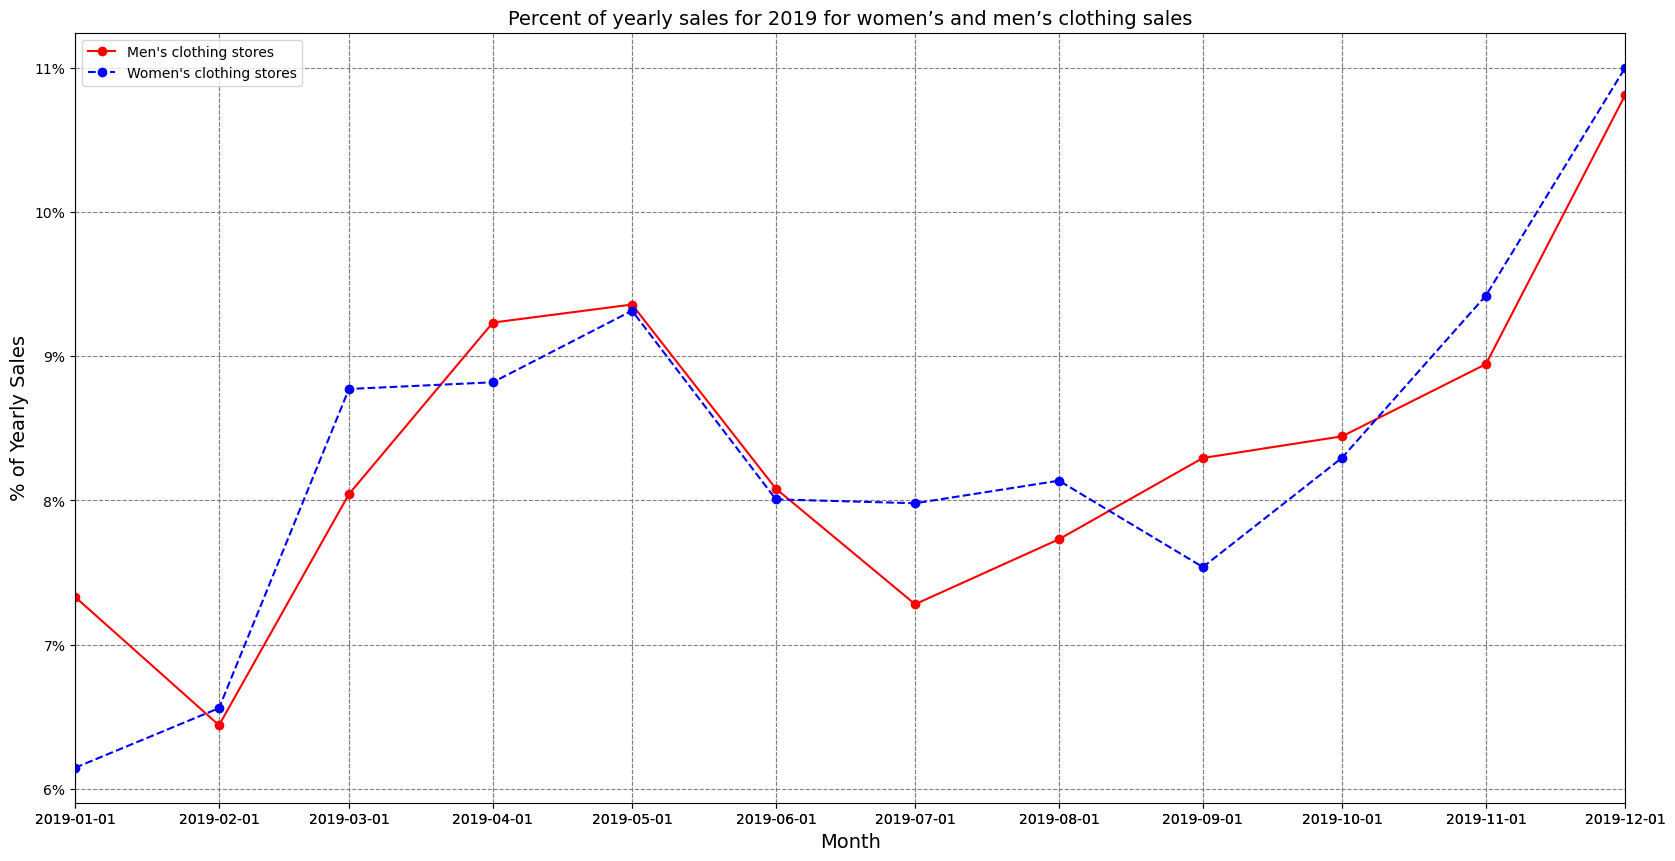

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = df_percent_of_yearly_total_sales_for_each_category

# Convert the 'sales_month' column to datetime format
df['sales_month'] = pd.to_datetime(df['sales_month'])

# Filter the data for 2019 only
df = df[(df['sales_month'] >= pd.to_datetime('2019-01-01')) & (df['sales_month'] < pd.to_datetime('2020-01-01'))]

plt.figure(figsize=(20, 10))

men_sales = df['pct_yearly'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_sales = df['pct_yearly'].loc[df['kind_of_business'] == "Women's clothing stores"]
men_months = df['sales_month'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_months = df['sales_month'].loc[df['kind_of_business'] == "Women's clothing stores"]

plt.plot(men_months, men_sales, label="Men's clothing stores", color='red', linestyle="-", marker='o')
plt.plot(women_months, women_sales, label="Women's clothing stores", color='blue', linestyle="--", marker='o')

plt.title(f"Percent of yearly sales for 2019 for women’s and men’s clothing sales", fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% of Yearly Sales', fontsize=14)

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Show some xticks for the men's and women's clothing stores
num_ticks = 10
men_step = len(men_months) // num_ticks
women_step = len(women_months) // num_ticks
plt.xticks(np.append(men_months[::men_step], women_months[::women_step]))

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Format y-axis tick labels as percentages
fmt = '%.0f%%'  # format string for tick labels
yticks = mtick.FormatStrFormatter(fmt)  # create formatter
plt.gca().yaxis.set_major_formatter(yticks)  # apply formatter to y-axis ticks

plt.legend()
plt.show()

The results for the year 2019 are displayed in Figure above. The two time series show a similar trend, but **men's stores had a higher proportion of their sales in January compared to women's stores**. Additionally, **men's stores experienced a summer dip in July**, while **women's stores experienced the same dip in September**.

### 3.5 Indexing to See Percent Change over Time

**Indexing time series data provides a way to understand the changes in a time series relative to a base period or starting point**. This technique is widely used in economics as well as business settings. One of the most famous examples of an index is the Consumer Price Index (CPI), which tracks the change in the prices of items that a typical consumer purchases and is used to track inflation, decide salary increases, and for many other applications. Although the CPI is a complex statistical measure that uses various weights and data inputs, the basic premise is straightforward: pick a base period and compute the percent change in value from that base period for each subsequent period.

In SQL, indexing time series data can be accomplished using a combination of aggregations and **window functions**. As an example, we can index the time series for men's and women's clothing stores to the first year in the series, which is 1992. The SQL code for this operation is as follows:

In [22]:
indexed_men_women_clothing_stores_sales_to_1992= """

SELECT 
sales_year, 
kind_of_business, 
sales,
first_value(sales) over (partition by kind_of_business order by sales_year) as index_sales,
(sales / first_value(sales) over (partition by kind_of_business order by sales_year) - 1) * 100 as pct_from_index

FROM
(
        SELECT strftime('%Y', sales_month) as sales_year
        ,kind_of_business
        ,sum(sales) as sales
        FROM retail_sales_DF
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')  and sales_month <= '2019-12-31'
GROUP BY 1,2
) a


"""
df_indexed_men_women_clothing_stores_sales_to_1992 = sqldf(indexed_men_women_clothing_stores_sales_to_1992)

In [23]:
df_indexed_men_women_clothing_stores_sales_to_1992.loc[df_indexed_men_women_clothing_stores_sales_to_1992['kind_of_business'] == "Women's clothing stores"].head(5)

,sales_year,kind_of_business,sales,index_sales,pct_from_index
28,1992,Women's clothing stores,31815.0,31815.0,0.000000
29,1993,Women's clothing stores,32350.0,31815.0,1.681597
30,1994,Women's clothing stores,30585.0,31815.0,-3.866101
31,1995,Women's clothing stores,28696.0,31815.0,-9.803552
32,1996,Women's clothing stores,28238.0,31815.0,-11.243124


In [24]:
df_indexed_men_women_clothing_stores_sales_to_1992.loc[df_indexed_men_women_clothing_stores_sales_to_1992['kind_of_business'] == "Men's clothing stores"].head(5)

,sales_year,kind_of_business,sales,index_sales,pct_from_index
0,1992,Men's clothing stores,10179.0,10179.0,0.000000
1,1993,Men's clothing stores,9962.0,10179.0,-2.131840
2,1994,Men's clothing stores,10032.0,10179.0,-1.444150
3,1995,Men's clothing stores,9315.0,10179.0,-8.488064
4,1996,Men's clothing stores,9546.0,10179.0,-6.218686


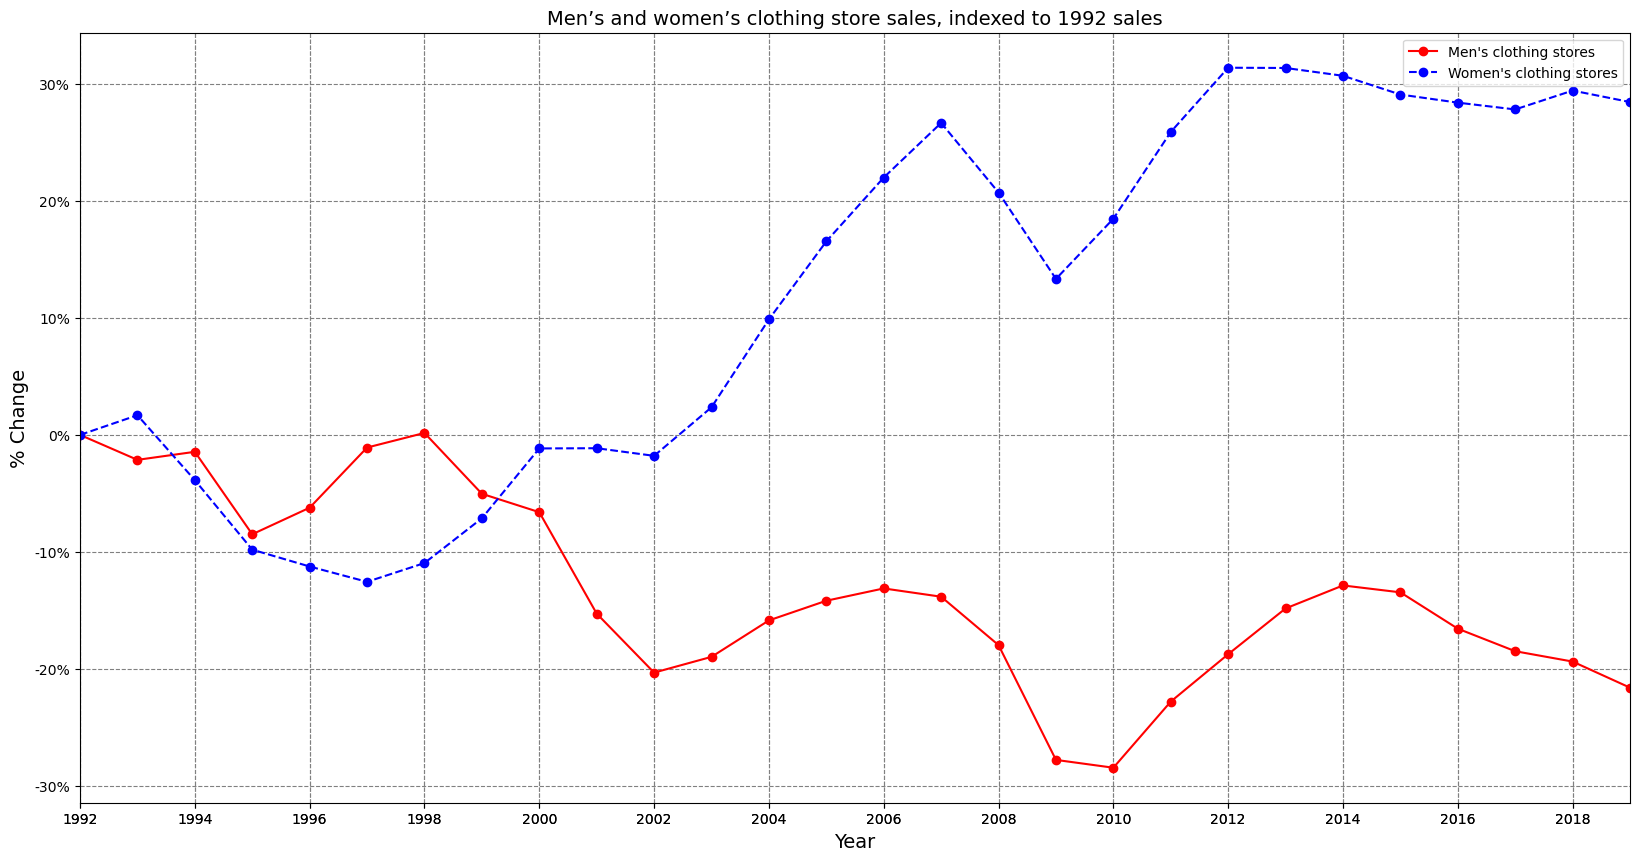

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = df_indexed_men_women_clothing_stores_sales_to_1992

plt.figure(figsize=(20, 10))

men_sales = df['pct_from_index'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_sales = df['pct_from_index'].loc[df['kind_of_business'] == "Women's clothing stores"]
men_months = df['sales_year'].loc[df['kind_of_business'] == "Men's clothing stores"]
women_months = df['sales_year'].loc[df['kind_of_business'] == "Women's clothing stores"]

plt.plot(men_months, men_sales, label="Men's clothing stores", color='red', linestyle="-", marker='o')
plt.plot(women_months, women_sales, label="Women's clothing stores", color='blue', linestyle="--", marker='o')

plt.title(f"Men’s and women’s clothing store sales, indexed to 1992 sales", fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('% Change', fontsize=14)

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Show some xticks for the men's and women's clothing stores
num_ticks = 10
men_step = len(men_months) // num_ticks
women_step = len(women_months) // num_ticks
plt.xticks(np.append(men_months[::men_step], women_months[::women_step]))

# Automatically adjust the x-axis scale based on the data

plt.gca().autoscale(axis='x', tight=True)

# Format y-axis tick labels as percentages
fmt = '%.0f%%'  # format string for tick labels
yticks = mtick.FormatStrFormatter(fmt)  # create formatter
plt.gca().yaxis.set_major_formatter(yticks)  # apply formatter to y-axis ticks

plt.legend()
plt.show()

Based on the graph above, it is evident that **sales at men's clothing stores reached a peak in 1992**, and since then, they have been on a decline with a brief return to the same level in 1998. Interestingly, this trend is observed even though the data set is not adjusted for inflation. On the other hand, **sales at women's clothing stores initially decreased from the 1992 levels, but they returned to the same level in 2003, and since then, they have been on an increasing trend, except for the drop during the financial crisis of 2009-2010.** There could be several reasons for these trends, such as a decrease in men's spending on clothes over time, or a shift in men's clothing purchases to other types of retailers. It is also possible that men's clothing became less expensive due to global supply chains, or that men became less fashion-conscious compared to women.

Overall, **indexing time series data is a powerful analysis technique that can help us gain insights into the data and understand the underlying trends.**

## 4. Rolling Time Windows

**Time series data can be noisy, making it challenging to identify patterns.** Aggregating data from monthly to yearly intervals is one technique that can help to smooth the results and make them easier to interpret. **Another method for smoothing data is to use rolling time windows, which take into account multiple periods.** Rolling time windows are used in a wide range of analysis areas, including macroeconomic trends, audience measurement, and stock markets. Some commonly used calculations have their own acronyms, such as **last twelve months (LTM), trailing twelve months (TTM), and year-to-date (YTD).**

When working with rolling time series calculations, there are several important factors to consider. 

Firstly, the **size of the window** is crucial, as it determines the number of periods to include in the calculation. Larger windows with more time periods have a greater smoothing effect but may overlook important short-term changes in the data. Conversely, shorter windows with fewer time periods provide less smoothing, making them more sensitive to short-term changes, but at the risk of excessive noise reduction.

The second factor in time series calculations is the **aggregate function used**. Moving averages are the most common, but moving sums, counts, minimums, and maximums can also be calculated using SQL. Moving counts are useful in user population metrics, while moving minimums and maximums can help to identify the extremes of the data, which is helpful for planning analyses.

Lastly, **partitioning or grouping of data must be selected to include in the window.** The analysis may require resetting the window every year or using a different moving series for each component or user group.

With these three factors in mind, we can move into the SQL code and calculations for moving time periods, using the US retail sales dataset as an example.

### 4.1 Calculating Rolling Time Windows

To start, we'll focus on a simpler case, we will explore how to calculate a rolling time window when the data set contains a record for each period that should be in the window.

There are different methods to calculate a rolling time window, and one commonly used technique is using window functions. However, it's worth noting that not all databases support window functions. In such cases, alternative methods such as subqueries or self-joins can be used to achieve the same result.

In this example, we will calculate a rolling 12-month window for retail sales. Since the data is at a monthly level of granularity, we will use a window size of 12 months. To smooth out the data and make it easier to interpret, we will then apply an average to obtain the 12-month moving average of retail sales.

In [26]:
_12_month_moving_average_sales_for_women_clothing_stores= """

SELECT 
sales_month,
sales,
avg(sales) over (order by sales_month rows between 11 preceding and current row) as moving_avg,
count(sales) over (order by sales_month rows between 11 preceding and current row) as records_count

FROM retail_sales_DF

WHERE kind_of_business = 'Women''s clothing stores'

"""
df_12_month_moving_average_sales_for_women_clothing_stores = sqldf(_12_month_moving_average_sales_for_women_clothing_stores)
df_12_month_moving_average_sales_for_women_clothing_stores[df_12_month_moving_average_sales_for_women_clothing_stores['sales_month'] >= '1993-01-01'].head(7)

,sales_month,sales,moving_avg,records_count
12,1993-01-01,2123.0,2672.083333,12
13,1993-02-01,2005.0,2673.250000,12
14,1993-03-01,2442.0,2676.500000,12
15,1993-04-01,2762.0,2684.583333,12
16,1993-05-01,2873.0,2694.666667,12
17,1993-06-01,2552.0,2705.333333,12
18,1993-07-01,2539.0,2719.166667,12


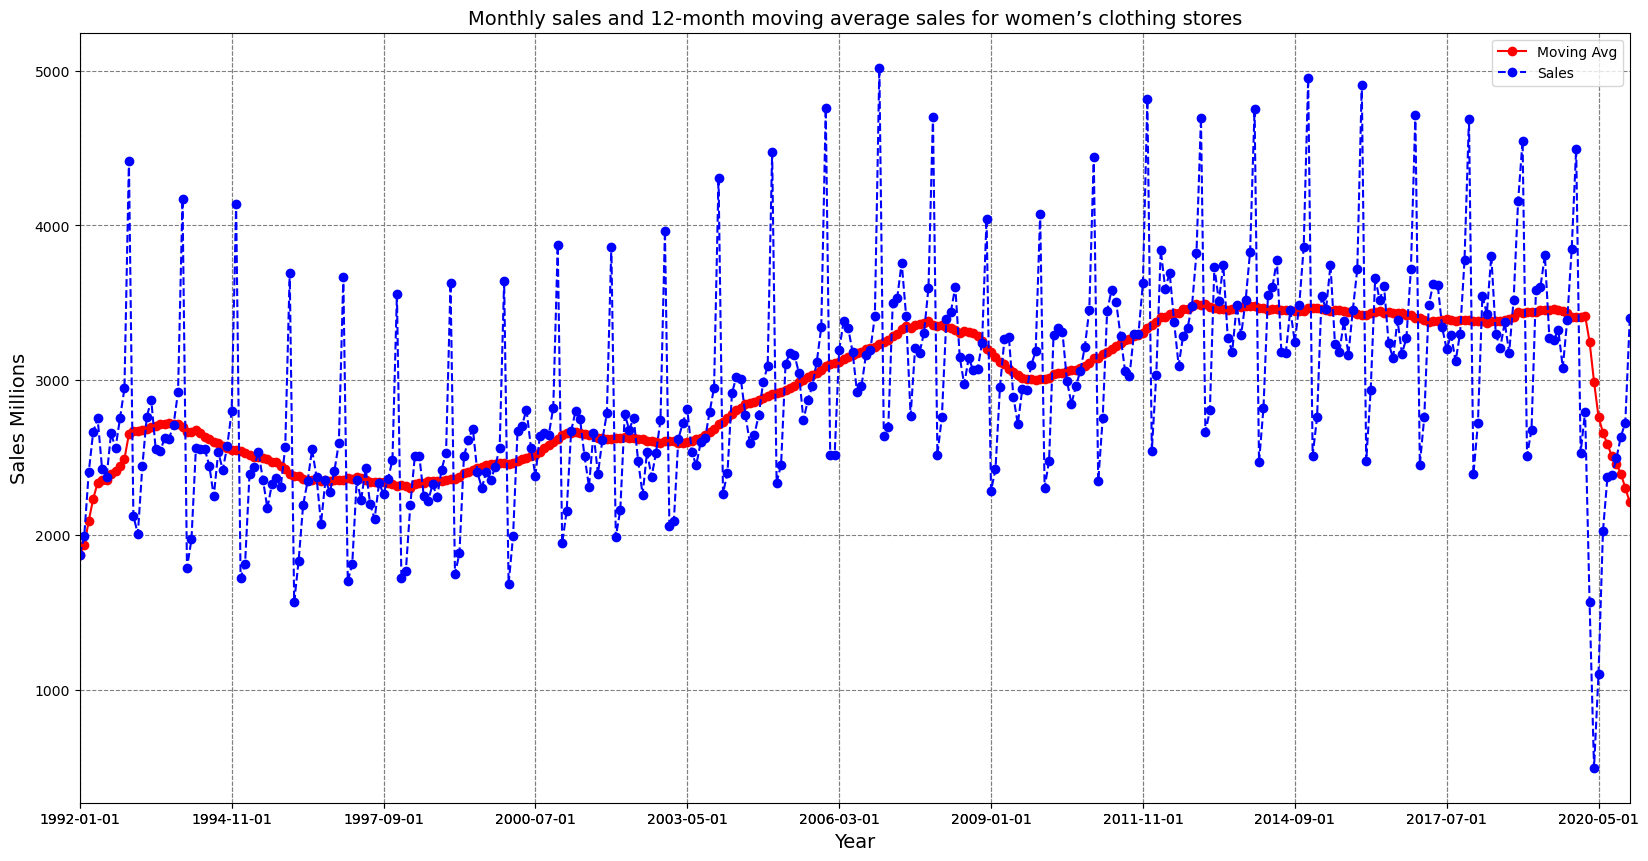

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = df_12_month_moving_average_sales_for_women_clothing_stores

plt.figure(figsize=(20, 10))

moving_avg = df['moving_avg']
women_sales = df['sales']
months = df['sales_month']


plt.plot(months,moving_avg, label="Moving Avg", color='red', linestyle="-", marker='o')
plt.plot(months,women_sales, label="Sales", color='blue', linestyle="--", marker='o')

plt.title(f"Monthly sales and 12-month moving average sales for women’s clothing stores", fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales Millions', fontsize=14)

plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Show some xticks for the men's and women's clothing stores
num_ticks = 10
moving_avg_step = len(months) // num_ticks
women_sales_step = len(months) // num_ticks
plt.xticks(np.append(months[::moving_avg_step], months[::women_sales_step]))

# Automatically adjust the x-axis scale based on the data
plt.gca().autoscale(axis='x', tight=True)


plt.legend()
plt.show()

As shown in the graph in Figure above, the monthly sales trend appears to be noisy and difficult to interpret. However, by using a smoothed moving average trend, it becomes easier to detect changes in the data, such as the increase from 2003 to 2007 and the subsequent dip through 2011. It's worth noting that the extreme drop in early 2020 causes the moving average to remain low even after sales start to rebound later in the year.

### 4.2 Calculating Cumulative Values

Cumulative calculations, such as YTD, quarter-to-date (QTD), and month-to-date (MTD), are commonly used in data analysis to evaluate business performance. These calculations start from a fixed point and grow in size with each data row, unlike fixed-length windows.

Window functions can be used to calculate cumulative values easily. For instance, sum function can be applied to determine total sales YTD for each month. If we need to obtain monthly average YTD or monthly maximum YTD, we can replace sum with avg or max, respectively.

The query output displays a record for each sales_month, presenting the sales for that month and the running total sales_ytd. Such insights help to identify business trends and potential areas for improvement. By utilizing cumulative calculations, data analysts can make informed decisions and drive business growth.

In [28]:
moving_average_sales_for_women_clothing_stores_sparse_data= """

SELECT sales_month
,sales
,sum(sales) over (partition by strftime('%Y', sales_month) order by sales_month) as sales_ytd
FROM retail_sales_DF
WHERE kind_of_business = 'Women''s clothing stores'

"""
df_moving_average_sales_for_women_clothing_stores_sparse_data = sqldf(moving_average_sales_for_women_clothing_stores_sparse_data)
df_moving_average_sales_for_women_clothing_stores_sparse_data.head(7)

,sales_month,sales,sales_ytd
0,1992-01-01,1873.0,1873.0
1,1992-02-01,1991.0,3864.0
2,1992-03-01,2403.0,6267.0
3,1992-04-01,2665.0,8932.0
4,1992-05-01,2752.0,11684.0
5,1992-06-01,2424.0,14108.0
6,1992-07-01,2373.0,16481.0


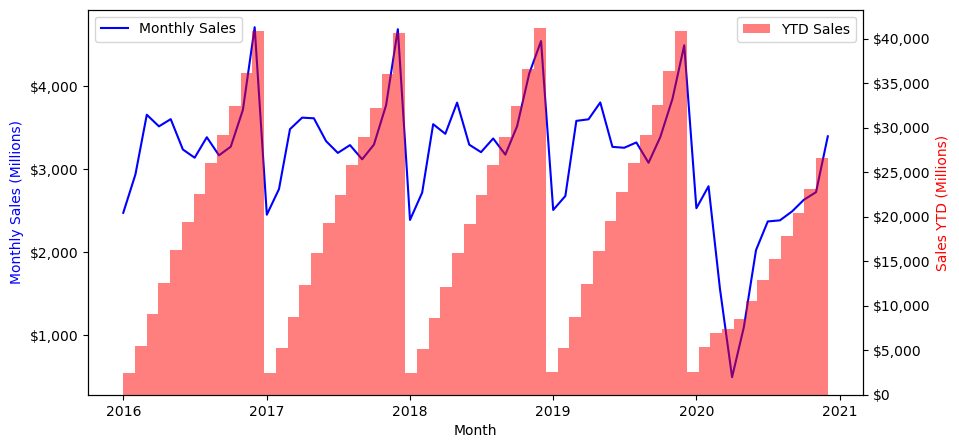

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Load data
df = df_moving_average_sales_for_women_clothing_stores_sparse_data

# Convert the 'sales_month' column to datetime format
df['sales_month'] = pd.to_datetime(df['sales_month'])
df = df[(df['sales_month'] >= pd.to_datetime('2016-01-01')) & (df['sales_month'] < pd.to_datetime('2021-01-01'))]
sales_ytd = df['sales_ytd']
sales = df['sales']
months = df['sales_month']

# Create subplots with a larger figure size
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot line chart of monthly sales
ax1.plot(months, sales, color='blue', label='Monthly Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Monthly Sales (Millions)', color='blue')

# Create histogram of YTD sales on the same subplot
ax2 = ax1.twinx()
ax2.hist(months, bins=60, weights=sales_ytd, color='red', alpha=0.5, label='YTD Sales')
ax2.set_ylabel('Sales YTD (Millions)', color='red')

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)
ax2.yaxis.set_major_formatter(tick)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Automatically adjust the x-axis scale based on the data
plt.gca().autoscale(axis='x', tight=True)

# Show the plot
plt.show()

Figure above displays a graphical representation of the data for the years 2016 through 2020. While the first four years exhibit consistent patterns throughout the year, the data for 2020 shows a marked deviation from the previous years.

This visualization allows us to observe the trends in the data over time, and detect any unusual patterns or changes. The distinctive pattern in 2020 highlights a significant shift in the underlying dynamics, which could be further investigated to uncover potential factors contributing to this change.

## 5. Analyzing With Seasonality

Seasonality refers to any recurring pattern that appears at regular intervals in a dataset. Unlike other random variations in data, seasonality can be predicted. Typically, we associate the term seasonality with the four seasons of the year - spring, summer, fall, and winter. However, these patterns may also exist at other time scales, ranging from years to minutes.

For example, restaurants experience daily seasonality, with busy periods around lunch and dinner times and slower sales in between. To determine if seasonality exists in a time series and at what scale, it is helpful to create a graph and visually inspect it for patterns. You can also try aggregating the data at different levels, such as hourly, daily, weekly, or monthly, to better understand the seasonality.

To better understand seasonal patterns in retail sales data, we will examine sales data for bookstores, grocery stores, and jewelry stores. By analyzing sales trends for each store type, we can identify any patterns that repeat at regular intervals throughout the year. This analysis will provide valuable insights into how sales fluctuate over time, and enable us to make more accurate predictions about future sales trends.

In [30]:
monthly_sales = """

select
sales_month,
SUM(sales_jewelry_stores) as sales_jewelry_stores,
SUM(sales_book_stores) as sales_book_stores,
SUM(sales_grocery_stores) as sales_grocery_stores

FROM

(
SELECT 
sales_month,
CASE WHEN kind_of_business in ('Jewelry stores') then sales ELSE 0 END as sales_jewelry_stores,
CASE WHEN kind_of_business in ('Book stores') then sales ELSE 0 END as sales_book_stores,
CASE WHEN kind_of_business in ('Grocery stores') then sales ELSE 0 END as sales_grocery_stores
FROM retail_sales_DF
WHERE kind_of_business in ('Jewelry stores','Book stores','Grocery stores')
ORDER BY 1
) sales
group by sales_month

"""
df_monthly_sales= sqldf(monthly_sales)
df_monthly_sales.head(7)

,sales_month,sales_jewelry_stores,sales_book_stores,sales_grocery_stores
0,1992-01-01,796.0,790.0,27306.0
1,1992-02-01,1021.0,539.0,26223.0
2,1992-03-01,912.0,535.0,27235.0
3,1992-04-01,969.0,523.0,27588.0
4,1992-05-01,1171.0,552.0,28883.0
5,1992-06-01,1094.0,589.0,28039.0
6,1992-07-01,1037.0,592.0,29479.0


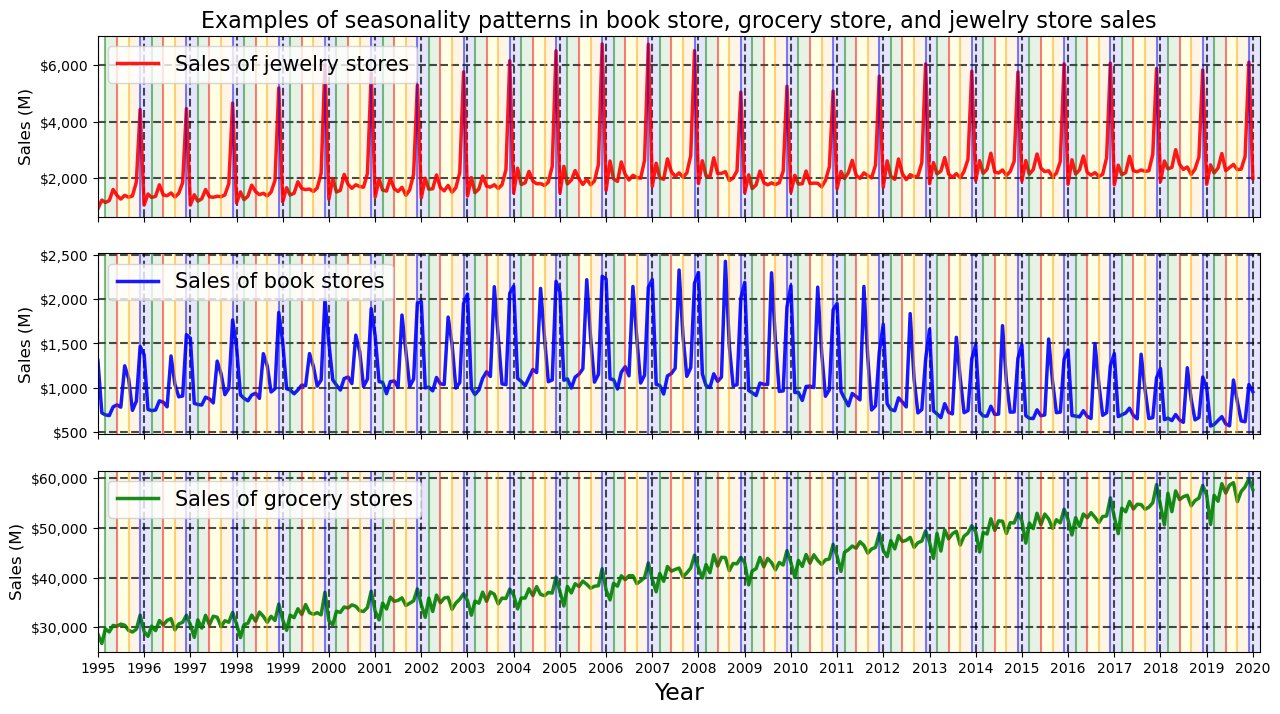

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import pandas as pd

# Define the boundaries of each season for all the years
season_boundaries = {}
for year in range(1995, 2021):
    spring_start = pd.to_datetime(str(year)+'-03-01')
    summer_start = pd.to_datetime(str(year)+'-06-01')
    fall_start = pd.to_datetime(str(year)+'-09-01')
    winter_start = pd.to_datetime(str(year)+'-12-01')
    season_boundaries[year] = {'spring_start': spring_start,
                               'summer_start': summer_start,
                               'fall_start': fall_start,
                               'winter_start': winter_start}

# Load data
df = df_monthly_sales

# Convert the 'sales_month' column to datetime format
df['sales_month'] = pd.to_datetime(df['sales_month'])

df = df[(df['sales_month'] >= pd.to_datetime('1995-01-01')) & (df['sales_month'] <= pd.to_datetime('2020-01-01'))]

sales_jewelry_stores = df['sales_jewelry_stores']

sales_book_stores = df['sales_book_stores']

sales_grocery_stores = df['sales_grocery_stores']

months = df['sales_month']

# Set up the figure and the subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Plot the first subplot (top)

ax1.plot(months, sales_jewelry_stores, color='red', linewidth=2.5, alpha=0.9)

# Set x-tick labels to be year
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(years_fmt)

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Display major gridlines
ax1.grid(visible=True, which='major', color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add shadow color for each season for all the years to the first subplot
for year in range(1995, 2020):
    ax1.axvspan(season_boundaries[year]['spring_start'], season_boundaries[year]['summer_start'], facecolor='green', alpha=0.1)
    ax1.axvspan(season_boundaries[year]['summer_start'], season_boundaries[year]['fall_start'], facecolor='yellow', alpha=0.1)
    ax1.axvspan(season_boundaries[year]['fall_start'], season_boundaries[year]['winter_start'], facecolor='orange', alpha=0.1)
    ax1.axvspan(season_boundaries[year]['winter_start'], season_boundaries[year+1]['spring_start'], facecolor='blue', alpha=0.1)

# Add gridlines for each season for all the years to the first subplot
for year in range(1995, 2020):
    ax1.axvline(season_boundaries[year]['spring_start'], color='green', linestyle='-', alpha=0.5)
    ax1.axvline(season_boundaries[year]['summer_start'], color='red', linestyle='-', alpha=0.5)
    ax1.axvline(season_boundaries[year]['fall_start'], color='orange', linestyle='-', alpha=0.5)
    ax1.axvline(season_boundaries[year]['winter_start'], color='blue', linestyle='-', alpha=0.5)
    
# Add title and axis labels for the first subplot

ax1.set_title('Examples of seasonality patterns in book store, grocery store, and jewelry store sales', fontsize=16)
ax1.set_ylabel('Sales (M)', fontsize=12)


# second subplot


# Plot the first subplot (top)

ax2.plot(months, sales_book_stores, color='blue', linewidth=2.5, alpha=0.9)

# Set x-tick labels to be year
years_fmt = mdates.DateFormatter('%Y')
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(years_fmt)

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick)

# Display major gridlines
ax2.grid(visible=True, which='major', color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add shadow color for each season for all the years to the first subplot
for year in range(1995, 2020):
    ax2.axvspan(season_boundaries[year]['spring_start'], season_boundaries[year]['summer_start'], facecolor='green', alpha=0.1)
    ax2.axvspan(season_boundaries[year]['summer_start'], season_boundaries[year]['fall_start'], facecolor='yellow', alpha=0.1)
    ax2.axvspan(season_boundaries[year]['fall_start'], season_boundaries[year]['winter_start'], facecolor='orange', alpha=0.1)
    ax2.axvspan(season_boundaries[year]['winter_start'], season_boundaries[year+1]['spring_start'], facecolor='blue', alpha=0.1)

# Add gridlines for each season for all the years to the first subplot
for year in range(1995, 2020):
    ax2.axvline(season_boundaries[year]['spring_start'], color='green', linestyle='-', alpha=0.5)
    ax2.axvline(season_boundaries[year]['summer_start'], color='red', linestyle='-', alpha=0.5)
    ax2.axvline(season_boundaries[year]['fall_start'], color='orange', linestyle='-', alpha=0.5)
    ax2.axvline(season_boundaries[year]['winter_start'], color='blue', linestyle='-', alpha=0.5)
    
# Add title and axis labels for the first subplot

# ax2.set_title('Monthly Sales of Book Stores', fontsize=16)

ax2.set_ylabel('Sales (M)', fontsize=12)

# Third subplot

# Plot the first subplot (top)

ax3.plot(months, sales_grocery_stores, color='green', linewidth=2.5, alpha=0.9)

# Set x-tick labels to be year
years_fmt = mdates.DateFormatter('%Y')
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(years_fmt)

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax3.yaxis.set_major_formatter(tick)

# Display major gridlines
ax3.grid(visible=True, which='major', color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add shadow color for each season for all the years to the first subplot
for year in range(1995, 2020):
    ax3.axvspan(season_boundaries[year]['spring_start'], season_boundaries[year]['summer_start'], facecolor='green', alpha=0.1)
    ax3.axvspan(season_boundaries[year]['summer_start'], season_boundaries[year]['fall_start'], facecolor='yellow', alpha=0.1)
    ax3.axvspan(season_boundaries[year]['fall_start'], season_boundaries[year]['winter_start'], facecolor='orange', alpha=0.1)
    ax3.axvspan(season_boundaries[year]['winter_start'], season_boundaries[year+1]['spring_start'], facecolor='blue', alpha=0.1)

# Add gridlines for each season for all the years to the first subplot
for year in range(1995, 2020):
    ax3.axvline(season_boundaries[year]['spring_start'], color='green', linestyle='-', alpha=0.5)
    ax3.axvline(season_boundaries[year]['summer_start'], color='red', linestyle='-', alpha=0.5)
    ax3.axvline(season_boundaries[year]['fall_start'], color='orange', linestyle='-', alpha=0.5)
    ax3.axvline(season_boundaries[year]['winter_start'], color='blue', linestyle='-', alpha=0.5)
    
# Add title and axis labels for the first subplot

# ax3.set_title('Monthly Sales of Grocery Stores', fontsize=16)
ax3.set_xlabel('Year', fontsize=17)
ax3.set_ylabel('Sales (M)', fontsize=12)

# Automatically adjust the x-axis scale based on the data

ax1.autoscale(axis='x', tight=True)
ax2.autoscale(axis='x', tight=True)
ax3.autoscale(axis='x', tight=True)

# Add legend to the first subplot with multiple labels
ax1.legend(['Sales of jewelry stores'], loc='upper left', fontsize=15)

ax2.legend(['Sales of book stores'], loc='upper left', fontsize=15)

ax3.legend(['Sales of grocery stores'], loc='upper left', fontsize=15)

plt.show()

The above figure presents seasonal patterns for different types of stores. The patterns are as follows:

1) **Jewelry stores** exhibit a highly seasonal pattern with **annual peaks in December**, which can be attributed to the holiday gift-giving tradition.

2) **Book stores** display two peaks each year. The **first peak occurs in August**, which coincides with the back-to-school season in the United States. The **second peak starts in December and lasts through January**, covering the holiday gift period and the back-to-school time for the spring semester.

3) **Grocery stores** have a relatively low level of monthly seasonality in comparison to the other two time series. However, they are likely to exhibit seasonality at the day-of-week and time-of-day level. It is expected that grocery store sales **increase slightly in December** due to the holiday season and **decline in February**, which has fewer days.

Seasonality can take various forms, but there are common approaches to analyze it. One way is to smooth the data by aggregating it to a less granular time period or using rolling windows. Another approach is to benchmark the data against similar time periods and analyze the difference. In the subsequent section, we will discuss several ways to accomplish this.

### 5.1 Period-over-Period Comparisons: YoY and MoM

There are many ways to conduct period-over-period comparisons. One common approach is to compare a specific time period with the previous value in the series. In fact, this method is so prevalent in data analysis that there are acronyms for the most commonly used comparisons. Depending on the level of aggregation, these comparisons can be **year-over-year (YoY)**, **month-over-month (MoM)**, **day-over-day (DoD)**, and so on.

To conduct these calculations, we can utilize the **lag function**, which is another window function. Specifically, **the lag function allows us to retrieve a previous or lagging value from a series.**

To illustrate this, let's use our retail sales dataset to calculate both MoM and YoY growth.

- MoM Growth refers to the percent change from the previous value in the same month.
- YoY Growth refers to the percent change from the previous value in the same month of the previous year.

We can use the lag function to retrieve the previous value and then calculate the percentage change to derive these growth metrics.

In [32]:
MoM_Growth_book_stores_sales = """

SELECT 
kind_of_business, 
sales_month, 
sales,

lag(sales_month) over (partition by kind_of_business order by sales_month) as prev_month,
lag(sales) over (partition by kind_of_business order by sales_month) as prev_month_sales,

(sales / lag(sales) over (partition by kind_of_business order by sales_month) - 1) * 100 as pct_growth_from_previous

FROM retail_sales_DF

WHERE kind_of_business = 'Book stores'

"""
df_MoM_Growth_book_stores_sales= sqldf(MoM_Growth_book_stores_sales)
df_MoM_Growth_book_stores_sales.head(7)

,kind_of_business,sales_month,sales,prev_month,prev_month_sales,pct_growth_from_previous
0,Book stores,1992-01-01,790.0,None,NaN,NaN
1,Book stores,1992-02-01,539.0,1992-01-01,790.0,-31.772152
2,Book stores,1992-03-01,535.0,1992-02-01,539.0,-0.742115
3,Book stores,1992-04-01,523.0,1992-03-01,535.0,-2.242991
4,Book stores,1992-05-01,552.0,1992-04-01,523.0,5.544933
5,Book stores,1992-06-01,589.0,1992-05-01,552.0,6.702899
6,Book stores,1992-07-01,592.0,1992-06-01,589.0,0.509338


In the dataset, there was a significant drop in sales of 31.8% from January to February. This decline was likely due, at least in part, to the seasonal dip after the holidays and the start of the spring semester. However, sales saw a much smaller decrease of only 0.7% from February to March.

To perform the **YoY** comparison, we first need to aggregate the sales data to the yearly level. Once we have aggregated the data, we can apply the same comparison method as before to determine how sales in the current year compare to the same period in the previous year.

In [33]:
YoY_Growth_book_stores_sales = """

SELECT 
sales_year, 
yearly_sales,
lag(yearly_sales) over (order by sales_year) as prev_year_sales,
(yearly_sales / lag(yearly_sales) over (order by sales_year) -1) * 100 as pct_growth_from_previous
FROM
(
        SELECT 
        strftime('%Y', sales_month) as sales_year,
        sum(sales) as yearly_sales
        FROM retail_sales_DF
        WHERE kind_of_business = 'Book stores'
        GROUP BY 1
) a

"""
df_YoY_Growth_book_stores_sales= sqldf(YoY_Growth_book_stores_sales)
df_YoY_Growth_book_stores_sales.head(7)

,sales_year,yearly_sales,prev_year_sales,pct_growth_from_previous
0,1992,8327.0,NaN,NaN
1,1993,9108.0,8327.0,9.379128
2,1994,10107.0,9108.0,10.968379
3,1995,11196.0,10107.0,10.774711
4,1996,11905.0,11196.0,6.332619
5,1997,12742.0,11905.0,7.030659
6,1998,13282.0,12742.0,4.237953


The data indicates that sales grew by over 9.3% from 1992 to 1993 and nearly 11% from 1993 to 1994. While these period-over-period calculations are useful, they do not provide an in-depth analysis of the seasonality present in the dataset. For instance, the MoM percent growth values plotted in the Figure below also exhibit significant seasonality similar to the original time series.

To address this issue, the next section will showcase how to utilize SQL to compare current values to the values for the same month in the previous year. This approach can provide better insights into the seasonality of the data, allowing us to understand how current values compare to the corresponding values from the previous year.

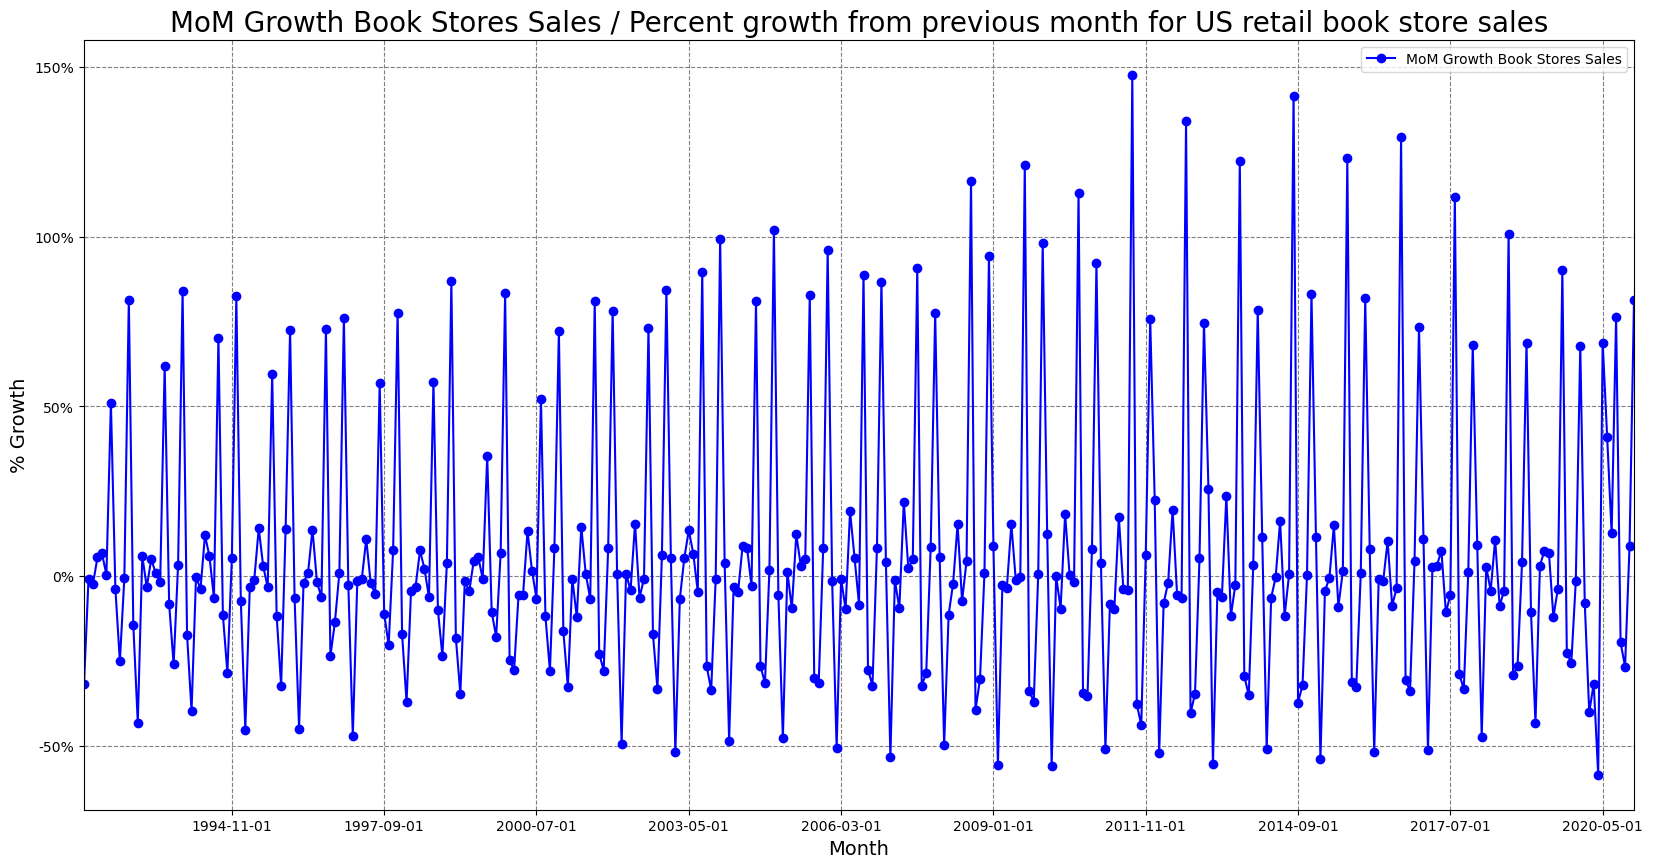

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

df = df_MoM_Growth_book_stores_sales

plt.figure(figsize=(20, 10))

MoM_book_stores_sales = df['pct_growth_from_previous']
months = df['sales_month']


plt.plot(months, MoM_book_stores_sales, label="MoM Growth Book Stores Sales", color='blue', linestyle="-", marker='o')

plt.title(f"MoM Growth Book Stores Sales / Percent growth from previous month for US retail book store sales", fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% Growth', fontsize=14)

plt.grid(visible=True, which='major', color='grey', linestyle='--')


# Show some xticks for the men's and women's clothing stores
num_ticks = 10
months_step = len(months) // num_ticks

plt.xticks(np.arange(0, len(months), months_step))

# Automatically adjust the x-axis scale based on the data

plt.autoscale(axis='x', tight=True)


# Format y-axis tick labels as percentages
fmt = '%.0f%%'  # format string for tick labels
yticks = mtick.FormatStrFormatter(fmt)  # create formatter
plt.gca().yaxis.set_major_formatter(yticks)  # apply formatter to y-axis ticks

plt.legend()
plt.show()

### 5.2 Period-over-Period Comparisons: Same Month Versus Last Year

Comparing data from a current time period with a similar previous period can help control for seasonality. This could be comparing sales for the same month in the previous year or the same day of the week in the previous week. We can achieve this comparison by using the lag function and partitioning the data based on the unit of time we want to compare. For instance, we can compare monthly sales by comparing sales for each month with the previous year's sales for the same month. We can then calculate metrics such as absolute difference and percent change from the previous period.

In [35]:
YoY_Same_Month_Comparison_for_Bookstore_Sales= """

SELECT 
sales_month,
sales,
lag(sales_month) over (partition by strftime('%m', sales_month) order by sales_month) as prev_year_month,
lag(sales) over (partition by strftime('%m', sales_month) order by sales_month) as prev_year_sales,
sales - lag(sales) over (partition by strftime('%m', sales_month) order by sales_month) as absolute_diff,
(sales / lag(sales) over (partition by strftime('%m', sales_month) order by sales_month) - 1) * 100 as pct_diff
FROM retail_sales_DF
WHERE kind_of_business = 'Book stores'

"""
df_YoY_Same_Month_Comparison_for_Bookstore_Sales= sqldf(YoY_Same_Month_Comparison_for_Bookstore_Sales)
df_YoY_Same_Month_Comparison_for_Bookstore_Sales.head(7)

,sales_month,sales,prev_year_month,prev_year_sales,absolute_diff,pct_diff
0,1992-01-01,790.0,None,NaN,NaN,NaN
1,1993-01-01,998.0,1992-01-01,790.0,208.0,26.329114
2,1994-01-01,1053.0,1993-01-01,998.0,55.0,5.511022
3,1995-01-01,1308.0,1994-01-01,1053.0,255.0,24.216524
4,1996-01-01,1373.0,1995-01-01,1308.0,65.0,4.969419
5,1997-01-01,1558.0,1996-01-01,1373.0,185.0,13.474144
6,1998-01-01,1463.0,1997-01-01,1558.0,-95.0,-6.097561


Before plotting the dataframe 'df_YoY_Same_Month_Comparison_for_Bookstore_Sales' using Matplotlib, we need to sort it based on the 'sales_month' field using the pandas sort function:

In [36]:
df_YoY_Same_Month_Comparison_for_Bookstore_Sales['sales_month'] = pd.to_datetime(df_YoY_Same_Month_Comparison_for_Bookstore_Sales['sales_month'])
df_YoY_Same_Month_Comparison_for_Bookstore_Sales.sort_values(by='sales_month', inplace=True)

We can visualize the results in the graph below to easily identify months with unusually high or low growth, such as January 2002 and December 2001, respectively.

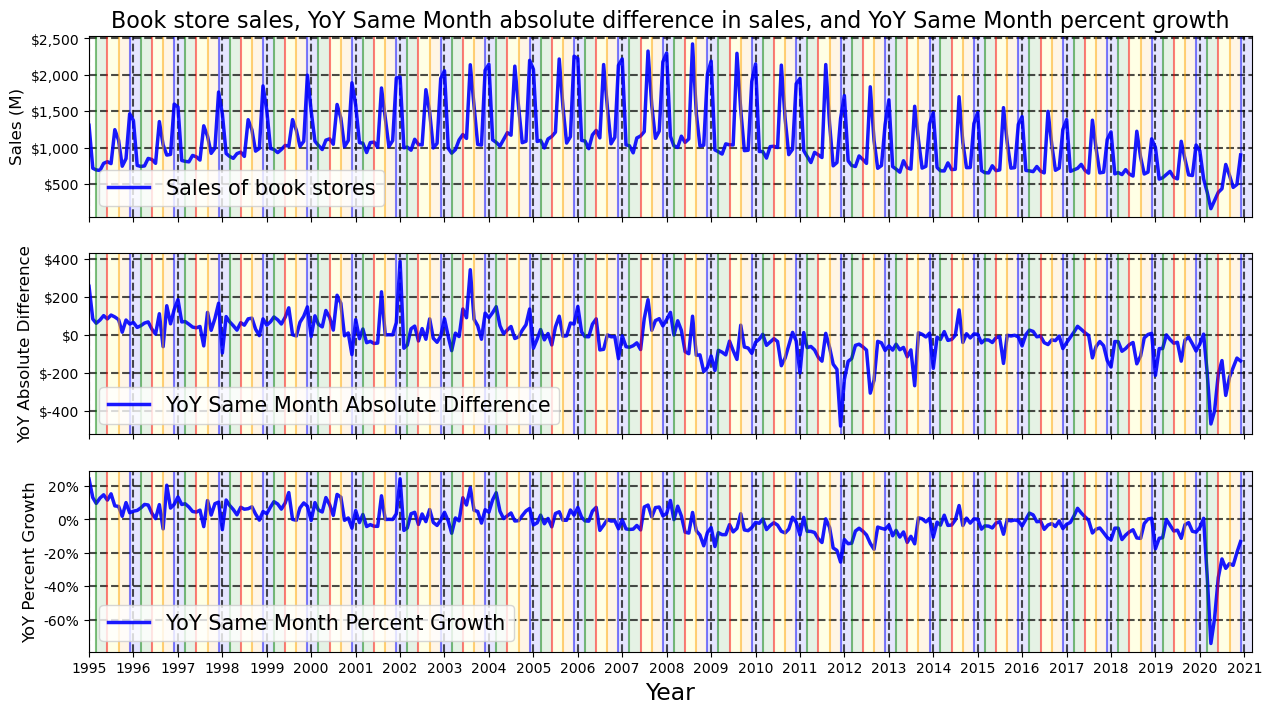

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import pandas as pd

# Define the boundaries of each season for all the years
season_boundaries = {}
for year in range(1995, 2022):
    spring_start = pd.to_datetime(str(year)+'-03-01')
    summer_start = pd.to_datetime(str(year)+'-06-01')
    fall_start = pd.to_datetime(str(year)+'-09-01')
    winter_start = pd.to_datetime(str(year)+'-12-01')
    season_boundaries[year] = {'spring_start': spring_start,
                               'summer_start': summer_start,
                               'fall_start': fall_start,
                               'winter_start': winter_start}

# Load data
df = df_YoY_Same_Month_Comparison_for_Bookstore_Sales

# Convert the 'sales_month' column to datetime format
df['sales_month'] = pd.to_datetime(df['sales_month'])

df = df[(df['sales_month'] >= pd.to_datetime('1995-01-01')) & (df['sales_month'] <= pd.to_datetime('2021-01-01'))]


sales_book_stores = df['sales']

YoY_absolute_difference = df['absolute_diff']

YoY_percent_growth = df['pct_diff']

months = df['sales_month']


# Set up the figure and the subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Plot the first subplot (top)

ax1.plot(months, sales_book_stores, color='blue', linewidth=2.5, alpha=0.9)

# Set x-tick labels to be year
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(years_fmt)

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Display major gridlines
ax1.grid(visible=True, which='major', color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add shadow color for each season for all the years to the first subplot
for year in range(1995, 2021):
    ax1.axvspan(season_boundaries[year]['spring_start'], season_boundaries[year]['summer_start'], facecolor='green', alpha=0.1)
    ax1.axvspan(season_boundaries[year]['summer_start'], season_boundaries[year]['fall_start'], facecolor='yellow', alpha=0.1)
    ax1.axvspan(season_boundaries[year]['fall_start'], season_boundaries[year]['winter_start'], facecolor='orange', alpha=0.1)
    ax1.axvspan(season_boundaries[year]['winter_start'], season_boundaries[year+1]['spring_start'], facecolor='blue', alpha=0.1)

# Add gridlines for each season for all the years to the first subplot
for year in range(1995, 2021):
    ax1.axvline(season_boundaries[year]['spring_start'], color='green', linestyle='-', alpha=0.5)
    ax1.axvline(season_boundaries[year]['summer_start'], color='red', linestyle='-', alpha=0.5)
    ax1.axvline(season_boundaries[year]['fall_start'], color='orange', linestyle='-', alpha=0.5)
    ax1.axvline(season_boundaries[year]['winter_start'], color='blue', linestyle='-', alpha=0.5)
    
# Add title and axis labels for the first subplot

ax1.set_title('Book store sales, YoY Same Month absolute difference in sales, and YoY Same Month percent growth', fontsize=16)
ax1.set_ylabel('Sales (M)', fontsize=12)


# second subplot


# Plot the first subplot (top)

ax2.plot(months, YoY_absolute_difference, color='blue', linewidth=2.5, alpha=0.9)

# Set x-tick labels to be year
years_fmt = mdates.DateFormatter('%Y')
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(years_fmt)

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick)

# Display major gridlines
ax2.grid(visible=True, which='major', color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add shadow color for each season for all the years to the first subplot
for year in range(1995, 2021):
    ax2.axvspan(season_boundaries[year]['spring_start'], season_boundaries[year]['summer_start'], facecolor='green', alpha=0.1)
    ax2.axvspan(season_boundaries[year]['summer_start'], season_boundaries[year]['fall_start'], facecolor='yellow', alpha=0.1)
    ax2.axvspan(season_boundaries[year]['fall_start'], season_boundaries[year]['winter_start'], facecolor='orange', alpha=0.1)
    ax2.axvspan(season_boundaries[year]['winter_start'], season_boundaries[year+1]['spring_start'], facecolor='blue', alpha=0.1)

# Add gridlines for each season for all the years to the first subplot
for year in range(1995, 2021):
    ax2.axvline(season_boundaries[year]['spring_start'], color='green', linestyle='-', alpha=0.5)
    ax2.axvline(season_boundaries[year]['summer_start'], color='red', linestyle='-', alpha=0.5)
    ax2.axvline(season_boundaries[year]['fall_start'], color='orange', linestyle='-', alpha=0.5)
    ax2.axvline(season_boundaries[year]['winter_start'], color='blue', linestyle='-', alpha=0.5)
    
# Add title and axis labels for the first subplot

# ax2.set_title('Monthly Sales of Book Stores', fontsize=16)

ax2.set_ylabel('YoY Absolute Difference', fontsize=12)

# Third subplot

# Plot the first subplot (top)

ax3.plot(months, YoY_percent_growth, color='blue', linewidth=2.5, alpha=0.9)

# Set x-tick labels to be year
years_fmt = mdates.DateFormatter('%Y')
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(years_fmt)

# Format the y-axis label of the first subplot to show sales in the format "$1,500"
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax3.yaxis.set_major_formatter(tick)

# Display major gridlines
ax3.grid(visible=True, which='major', color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add shadow color for each season for all the years to the first subplot
for year in range(1995, 2021):
    ax3.axvspan(season_boundaries[year]['spring_start'], season_boundaries[year]['summer_start'], facecolor='green', alpha=0.1)
    ax3.axvspan(season_boundaries[year]['summer_start'], season_boundaries[year]['fall_start'], facecolor='yellow', alpha=0.1)
    ax3.axvspan(season_boundaries[year]['fall_start'], season_boundaries[year]['winter_start'], facecolor='orange', alpha=0.1)
    ax3.axvspan(season_boundaries[year]['winter_start'], season_boundaries[year+1]['spring_start'], facecolor='blue', alpha=0.1)

# Add gridlines for each season for all the years to the first subplot
for year in range(1995, 2021):
    ax3.axvline(season_boundaries[year]['spring_start'], color='green', linestyle='-', alpha=0.5)
    ax3.axvline(season_boundaries[year]['summer_start'], color='red', linestyle='-', alpha=0.5)
    ax3.axvline(season_boundaries[year]['fall_start'], color='orange', linestyle='-', alpha=0.5)
    ax3.axvline(season_boundaries[year]['winter_start'], color='blue', linestyle='-', alpha=0.5)
    
# Add title and axis labels for the first subplot

# ax3.set_title('Monthly Sales of Grocery Stores', fontsize=16)
ax3.set_xlabel('Year', fontsize=17)
ax3.set_ylabel('YoY Percent Growth', fontsize=12)

# Format y-axis tick labels as percentages
fmt = '%.0f%%' # format string for tick labels
yticks = mtick.FormatStrFormatter(fmt) # create formatter
ax3.yaxis.set_major_formatter(yticks) # apply formatter to y-axis ticks


# Automatically adjust the x-axis scale based on the data

ax1.autoscale(axis='x', tight=True)
ax2.autoscale(axis='x', tight=True)
ax3.autoscale(axis='x', tight=True)

# Add legend to the first subplot with multiple labels
ax1.legend(['Sales of book stores'], loc='lower left', fontsize=15)

ax2.legend(['YoY Same Month Absolute Difference'], loc='lower left', fontsize=15)

ax3.legend(['YoY Same Month Percent Growth'], loc='lower left', fontsize=15)

plt.show()

A useful analysis technique is to create a graph that displays a line for each year in the same time period (e.g., months). To create this graph, we need to prepare a result set that contains a row for each month and a column for each year we want to consider. We'll then pivot the data using an aggregate function. For this example, we'll focus on the years 1992 through 1994.

In [38]:
YoY_aligned_by_month_for_Bookstore_Sales= """

SELECT 
  CAST(strftime('%m', date(sales_month)) AS INTEGER) as month_number,
  
  CASE
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=1 THEN 'January'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=2 THEN 'February'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=3 THEN 'March'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=4 THEN 'April'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=5 THEN 'May'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=6 THEN 'June'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=7 THEN 'July'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=8 THEN 'August'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=9 THEN 'September'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=10 THEN 'October'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=11 THEN 'November'
       WHEN CAST(strftime('%m', date(sales_month)) AS INTEGER)=12 THEN 'December'
       ELSE 'Invalid month number' END as month_name,
  
  
  max(case when strftime('%Y', date(sales_month)) = '1992' then sales end) as sales_1992,
  max(case when strftime('%Y', date(sales_month)) = '1993' then sales end) as sales_1993,
  max(case when strftime('%Y', date(sales_month)) = '1994' then sales end) as sales_1994
FROM retail_sales_DF
WHERE 
  kind_of_business = 'Book stores' 
  and sales_month between '1992-01-01' and '1994-12-01'
GROUP BY 1, 2

"""
df_YoY_aligned_by_month_for_Bookstore_Sales= sqldf(YoY_aligned_by_month_for_Bookstore_Sales)
df_YoY_aligned_by_month_for_Bookstore_Sales.head(50)

,month_number,month_name,sales_1992,sales_1993,sales_1994
0,1,January,790.0,998.0,1053.0
1,2,February,539.0,568.0,635.0
2,3,March,535.0,602.0,634.0
3,4,April,523.0,583.0,610.0
4,5,May,552.0,612.0,684.0
5,6,June,589.0,618.0,724.0
6,7,July,592.0,607.0,678.0
7,8,August,894.0,983.0,1154.0
8,9,September,861.0,903.0,1022.0
9,10,October,645.0,669.0,732.0


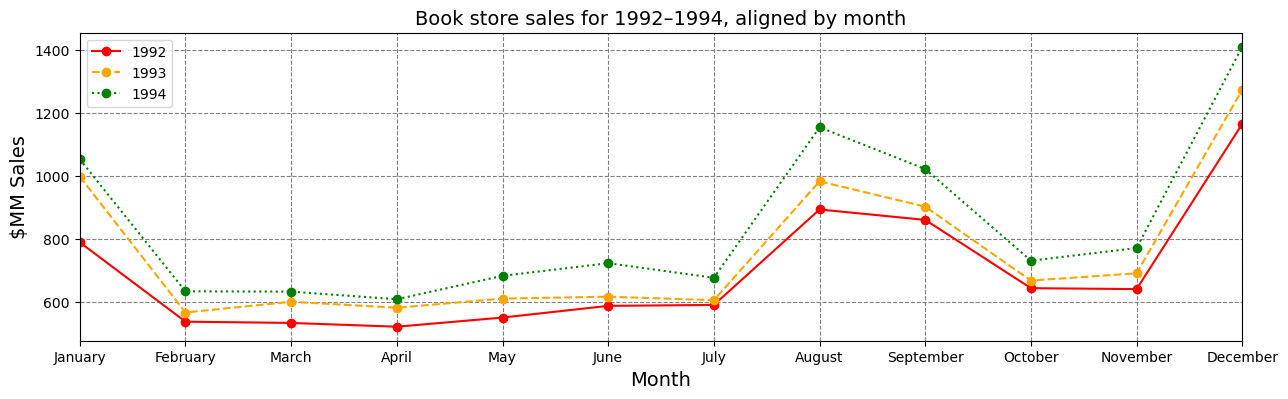

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = df_YoY_aligned_by_month_for_Bookstore_Sales


sales_1992 = df['sales_1992']

sales_1993 = df['sales_1993']

sales_1994 = df['sales_1994']

months = df['month_name']


plt.figure(figsize=(15, 4)) 

# plot a line graph

plt.plot(months,sales_1992, label='1992',color='red', linestyle="-" , marker='o')
plt.plot(months,sales_1993, label='1993',color='orange', linestyle="--" , marker='o')
plt.plot(months,sales_1994, label='1994',color='green', linestyle=":" , marker='o')


plt.title('Book store sales for 1992–1994, aligned by month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('$MM Sales', fontsize=14)

# Set the xticks
# plt.xticks(months.unique()[::2]) # show every 2 months

# Display major gridlines
plt.grid(visible=True, which='major', color='grey', linestyle='--')

# Automatically adjust the x-axis scale based on the data
field = 'sales_year'  # specify the field to use for determining the scale
plt.gca().autoscale(axis='x', tight=True)


plt.legend()
plt.show()

In the above plot, we lined up the data to identify some immediate trends. December had the highest monthly sales of the year. Sales in 1994 were consistently higher than in 1992 and 1993, with a visible bump in August-to-September sales in 1994.

Visualizing the data in a graph, as shown in the above figure, makes it easier to identify trends. While sales increased every year, the increase varied month to month. This data can help with inventory planning, scheduling marketing promotions, or serve as evidence in a wider story about US retail sales.

We've discussed techniques in SQL to compare time series data and control for seasonality. We've covered comparing current values to prior comparable periods using lag functions, and pivoting data with date_part, to_char, and aggregate functions. 

## 6. Conclusions, Trends, and Insights

When analyzing the US retail sales dataset, we have discovered several valuable insights and identified interesting trends that can enhance a data science portfolio on GitHub. Here are the main conclusions:

Exploring Simple Trends and Transforming and Aggregating the Data:

- Transforming and aggregating the data at different levels (e.g., yearly) provides a smoother representation of the sales trends.
- Overall, retail and food services sales have shown an increasing trend over time, except for a decline in 2009 during the global financial crisis and a stagnant period in 2020 due to the impact of the COVID-19 pandemic.

Comparing Components:

- By comparing sales trends for specific categories, such as bookstores, sporting goods stores, and hobby stores, we can gain insights into consumer spending behavior.
- Sporting goods stores experienced the highest sales growth, followed by hobby stores, while bookstores showed a decline. The impact of online retailers on these categories varied in terms of timing and magnitude.

Monthly Trend of Sales at Women's and Men's Clothing Stores:

- Women's clothing stores consistently outperformed men's clothing stores in terms of sales, although the gap between the two was not constant.
- Both categories experienced a drop in sales during the 2008-2009 global financial crisis, with women's clothing sales being more severely affected.
- The COVID-19 pandemic significantly impacted both categories, causing a sharp decline in sales in 2020.

Percent of Total Calculations:

- Analyzing the percentage contribution of each category to the total sales revealed interesting trends, such as the increasing market share for women's clothing and changes in seasonal patterns.

Indexing to See Percent Change over Time:

- Indexing time series data provides a way to understand changes relative to a base period.
- Sales at men's clothing stores declined over time, while sales at women's clothing stores increased, except for a dip during the financial crisis.

Rolling Time Windows:

- Rolling time windows help smooth data and identify patterns by considering multiple periods.
- Analyzing rolling time windows using techniques like moving averages can reveal trends and changes in retail sales.

Analyzing with Seasonality:

- Seasonality analysis identified recurring patterns in sales for different types of stores, such as holiday peaks for jewelry and bookstores.
- Grocery stores exhibited lower monthly seasonality but likely had day-of-week and time-of-day patterns.

Period-over-Period Comparisons:

- Comparing sales growth on a month-over-month (MoM) and year-over-year (YoY) basis can provide insights into short-term and long-term trends.
- Lag functions can be used to calculate MoM and YoY growth rates.

These insights and trends demonstrate the ability to analyze and interpret time series data, providing valuable information for decision-making and predictive modeling in the retail industry. In summary, analyzing data with seasonality requires reducing noise to better understand underlying trends. By comparing data points to multiple prior time periods, we can achieve a smoother trend and draw clearer conclusions about the current period. Time series analysis is a powerful tool for this purpose, and we can prepare our data by manipulating date and time dimensions, calculating rolling time windows, and conducting period-over-period calculations. With these techniques, we can effectively analyze data with seasonal patterns.